# Graph theory

See https://github.com/multinetlab-amsterdam/network_TDA_tutorial/blob/main/1-network_analysis.ipynb for tutorial on network analysis

In [62]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os
import glob as glob
import pickle 
import func
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import normalize
from nilearn.plotting import find_probabilistic_atlas_cut_coords


In [130]:

def get_features(res_path, folder):
    path = glob.glob(os.path.join(res_path, folder, 'features*'))
    features = dict()
    keys = ['pre', 'post', 'contrast']
    for p, key in zip(path,keys):
        features[key] = np.load(p, allow_pickle=True)
    return features
def load_dict(p,folder, name):
    with open(os.path.join(p,folder, name), 'rb') as f:
        results = pickle.load(f)
    return results
def load_all(p, folder, atlas_name):
    atlas, atlas_labels, atlas_type, confounds = func.load_choose_atlas(atlas_name=atlas_name)

    results = load_dict(p, folder, 'dict_results.pkl')
    features = get_features(p, folder)
    return results, atlas, atlas_labels

p = r'C:\Users\Dylan\Desktop\UM_Bsc_neurocog\E22\Projet_Ivado_rainvillelab\results\results_con'


results, atlas, labels = load_all(p, 'difumo64_tangentZ', 'difumo64')
#results, atlas, labels = load_all(p, 'difumo64_precision', 'difumo64')
#results, atlas, labels = load_all(p, 'yeo7_correlation', 'yeo_7')


Loading atlas:  difumo64


In [131]:
results.keys()

dict_keys(['pre_series', 'post_series', 'seed_pre_series', 'seed_post_series', 'seed_to_pre_correlations', 'seed_to_post_correlations', 'pre_connectomes', 'pre_mean_connectome', 'post_connectomes', 'post_mean_connectome', 'zcontrast_mean_connectome', 'contrast_connectomes', 'mean_seed_pre_connectome', 'mean_seed_post_connectome', 'mean_seed_contrast_connectome', 'preX', 'postX', 'contrastX'])

In [132]:
import numpy as np
np.unique(atlas.get_fdata(), return_counts=True)


(array([0.00000000e+00, 1.00297621e-06, 1.00594480e-06, ...,
        1.23702106e-03, 1.25465193e-03, 1.25810597e-03]),
 array([84979658,        1,        1, ...,        1,        1,        1],
       dtype=int64))

In [213]:
pre_mean_connectome = results['pre_mean_connectome']
post_mean_connectome = results['post_mean_connectome']
pre_connectomes = results['pre_connectomes']
post_connectomes = results['post_connectomes']
print(pre_mean_connectome.min(), post_mean_connectome.min())
contrast_mean_connectome = results['zcontrast_mean_connectome']
print(contrast_mean_connectome.max(), contrast_mean_connectome.min())
zcontrast = contrast_mean_connectome 

-0.09702450511866395 -0.08859615378496309
0.05025576301256056 -0.05975336299290883


In [214]:
# zeros for negatives edges
abs_pre_connectome = [np.maximum(connectome, 0) for connectome in results['pre_connectomes']]
abs_post_connectome = [np.maximum(connectome, 0) for connectome in results['post_connectomes']]
abs_mean_post = abs_post_connectomes.mean(axis=0)



NameError: name 'abs_post_connectomes' is not defined

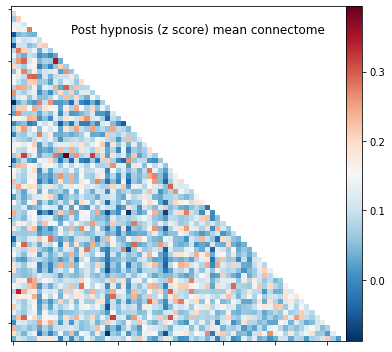

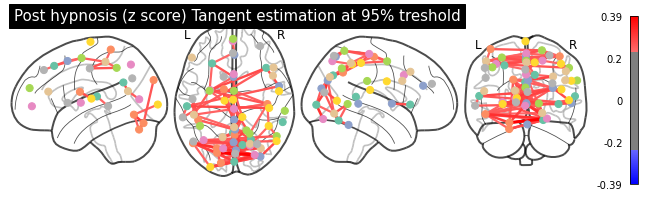

In [215]:
from nilearn import plotting

plotting.plot_matrix(
    results['post_mean_connectome'], colorbar=True, title = 'Post hypnosis (z score) mean connectome ', tri ='lower'
)

con_tresh = '95%'
cond = 'Post hypnosis (z score)'
cov_estim = 'Tangent estimation'
plotting.plot_connectome(
                results['post_mean_connectome'],
                find_probabilistic_atlas_cut_coords(atlas),
                edge_threshold=con_tresh,
                title=f"{cond} {cov_estim} at {con_tresh} treshold",
                display_mode="lzry",
                colorbar=True,
            )
plotting.show()

Find extreme values for tresholds

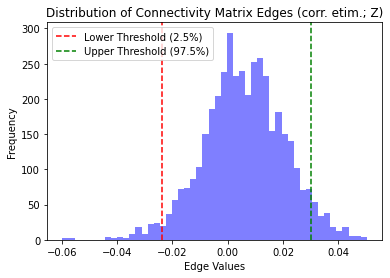

Lower Threshold (2.5%): -0.023695662547486118
Upper Threshold (97.5%): 0.030248523733414103


In [216]:
# Histogram highest 5% values
import matplotlib.pyplot as plt
import numpy as np

# Flatten the connectivity matrix to a 1D array
edges_values = zcontrast.flatten()

# Plot the histogram of edges' values
plt.hist(edges_values, bins=50, color='blue', alpha=0.5)
plt.xlabel('Edge Values')
plt.ylabel('Frequency')
plt.title('Distribution of Connectivity Matrix Edges (corr. etim.; Z)')

# Find the threshold values at the 2.5% extremes
lower_threshold = np.percentile(edges_values, 2.5)
upper_threshold = np.percentile(edges_values, 95)

# Display the threshold values on the plot
plt.axvline(x=lower_threshold, color='red', linestyle='--', label='Lower Threshold (2.5%)')
plt.axvline(x=upper_threshold, color='green', linestyle='--', label='Upper Threshold (97.5%)')
plt.legend()

# Show the plot
plt.show()

# Print the threshold values
print("Lower Threshold (2.5%):", lower_threshold)
print("Upper Threshold (97.5%):", upper_threshold)

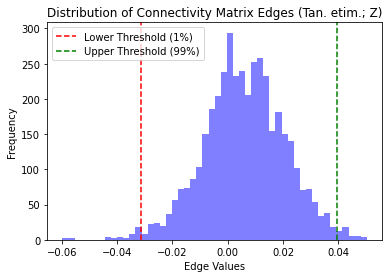

Lower Threshold (1%): -0.031244617991271904
Upper Threshold (99%): 0.03960106143600908


In [217]:
#Hist highest 1% values
import matplotlib.pyplot as plt
import numpy as np

# Flatten the connectivity matrix to a 1D array
edges_values = zcontrast.flatten()

# Plot the histogram of edges' values
plt.hist(edges_values, bins=50, color='blue', alpha=0.5)
plt.xlabel('Edge Values')
plt.ylabel('Frequency')
plt.title('Distribution of Connectivity Matrix Edges (Tan. etim.; Z)')

# Find the lower and upper threshold values at the desired percentiles
lower_threshold = np.percentile(edges_values, 1)
upper_threshold = np.percentile(edges_values, 99)

# Display the threshold values on the plot
plt.axvline(x=lower_threshold, color='red', linestyle='--', label='Lower Threshold (1%)')
plt.axvline(x=upper_threshold, color='green', linestyle='--', label='Upper Threshold (99%)')
plt.legend()

# Show the plot
plt.show()

# Print the threshold values
print("Lower Threshold (1%):", lower_threshold)
print("Upper Threshold (99%):", upper_threshold)


## 2. post-pre contrast correlation (figures)

In [218]:

# Define the absolute threshold values
positive_threshold =   upper_threshold
negative_threshold = lower_threshold

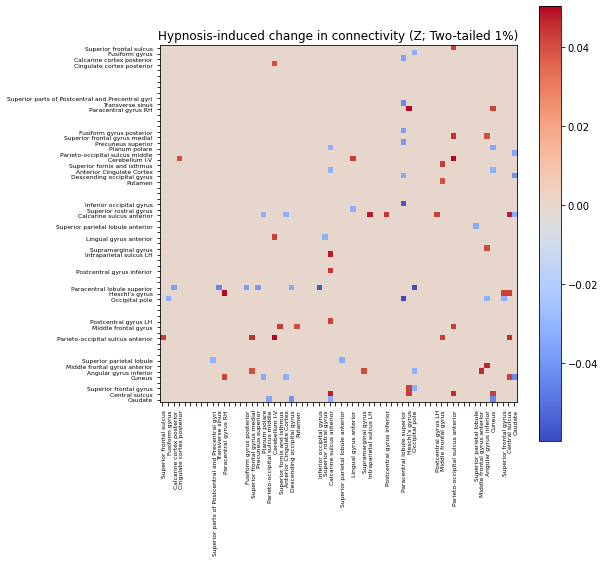

In [219]:
zcontrast_thresholded = np.where(zcontrast >= positive_threshold, zcontrast, 0)
zcontrast_thresholded = np.where(zcontrast <= negative_threshold, zcontrast, zcontrast_thresholded)

# Get the indices of the significant labels based on the thresholds
significant_labels_indices = np.where(np.sum(np.abs(zcontrast_thresholded), axis=0) > 0)[0]
significant_labels = [labels[i] if i in significant_labels_indices else ' ' for i in range(len(labels))]

fig, ax = plt.subplots(figsize=(8, 8))  # Adjust the figure size as needed
im = ax.imshow(zcontrast_thresholded, cmap='coolwarm')

# Set the tick labels and font size
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(significant_labels, fontsize=6)  # Adjust the label font size as desired
ax.set_yticklabels(significant_labels, fontsize=6)  # Adjust the label font size as desired

# Rotate the x-axis tick labels for better readability if needed
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")

# Create a colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set the title
ax.set_title('Hypnosis-induced change in connectivity (Z; Two-tailed 1%)')

# Show the plot
plt.show()

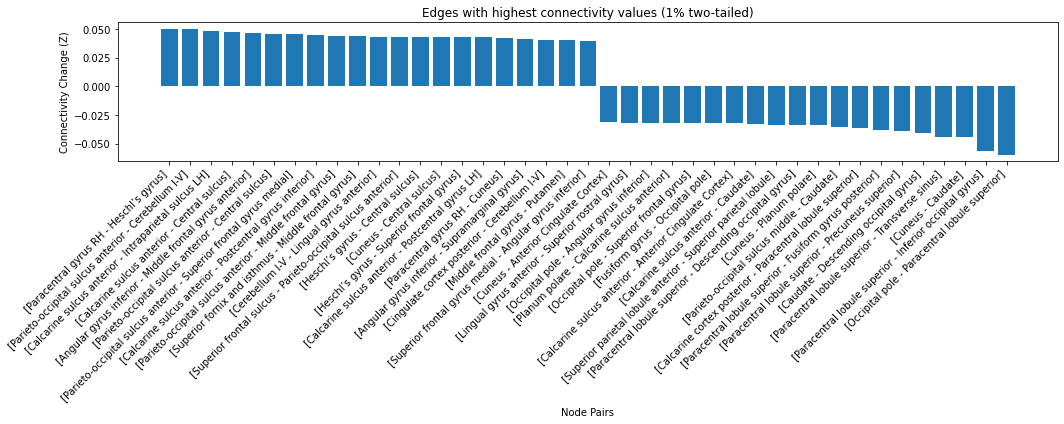

In [221]:
zcontrast_thresholded = np.where(zcontrast >= positive_threshold, zcontrast, 0)
zcontrast_thresholded = np.where(zcontrast <= negative_threshold, zcontrast, zcontrast_thresholded)
significant_labels_indices = np.where(np.sum(np.abs(zcontrast_thresholded), axis=0) > 0)[0]

G = nx.Graph()
for i in significant_labels_indices:
    for j in range(i + 1, len(labels)):
        edge_weight = zcontrast_thresholded[i, j]
        if edge_weight != 0:
            G.add_edge(labels[i], labels[j], weight=edge_weight)

# Sort the edges based on their weights in descending order
sorted_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)

# Create a pandas DataFrame to store the pairs of nodes and connectivity change (z value)
data = {
    'Node Pair': [f"[{u} - {v}]" for u, v, _ in sorted_edges],
    'Connectivity Change (Z)': [data['weight'] for _, _, data in sorted_edges]
}

df = pd.DataFrame(data)
df.to_csv('connectivity_changes.csv', index=False)

plt.figure(figsize=(15, 6))
plt.bar(df['Node Pair'], df['Connectivity Change (Z)'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Node Pairs')
plt.ylabel('Connectivity Change (Z)')
plt.title('Edges with highest connectivity values (1% two-tailed)')
plt.tight_layout()

# Save the plot as an image
plt.savefig('connectivity_changes.png')

# Show the plot (optional)
plt.show()


In [222]:
#Number of connections on matrix
# Create an empty graph
G = nx.Graph()

# Get the number of nodes in the matrix
num_nodes = zcontrast_thresholded.shape[0]

# Add nodes to the graph with labels
node_labels = [f"Node {i} ({labels[i]})" for i in range(num_nodes)]
G.add_nodes_from(range(num_nodes), label=node_labels)

# Iterate over the lower triangle of the thresholded matrix and add edges with non-zero values to the graph
for i in range(num_nodes):
    for j in range(i):  # Only iterate over the lower triangle
        edge_value = zcontrast_thresholded[i, j]
        if edge_value != 0 and labels[i] != ' ' and labels[j] != ' ':
            G.add_edge(i, j, weight=edge_value)

# Create a dictionary to store the number of non-empty connections for each node
non_empty_connections_dict = {node: 0 for node in G.nodes()}

# Count the number of non-empty connections for each node
for node in G.nodes():
    non_empty_connections = [1 for nbr in G[node] if G.nodes[nbr]['label'] != ' ']
    non_empty_connections_dict[node] = sum(non_empty_connections)

# Sort nodes based on the number of non-empty connections in descending order
sorted_nodes = sorted(non_empty_connections_dict.keys(), key=lambda x: non_empty_connections_dict[x], reverse=True)

# Print the nodes with their labels and the number of non-zero connections with non-empty labels
for node in sorted_nodes:
    if non_empty_connections_dict[node] >= 1:
        idx = int(node)
        print(f"{labels[idx]}: {non_empty_connections_dict[node]} non-zero connections")


Calcarine sulcus anterior: 7 non-zero connections
Paracentral lobule superior: 7 non-zero connections
Parieto-occipital sulcus anterior: 5 non-zero connections
Cuneus: 5 non-zero connections
Occipital pole: 4 non-zero connections
Angular gyrus inferior: 4 non-zero connections
Central sulcus: 4 non-zero connections
Caudate: 4 non-zero connections
Cerebellum I-V: 3 non-zero connections
Heschl’s gyrus: 3 non-zero connections
Middle frontal gyrus: 3 non-zero connections
Paracentral gyrus RH: 2 non-zero connections
Superior frontal gyrus medial: 2 non-zero connections
Planum polare: 2 non-zero connections
Anterior Cingulate Cortex: 2 non-zero connections
Descending occipital gyrus: 2 non-zero connections
Lingual gyrus anterior: 2 non-zero connections
Superior parietal lobule: 2 non-zero connections
Superior frontal gyrus: 2 non-zero connections
Superior frontal sulcus: 1 non-zero connections
Fusiform gyrus: 1 non-zero connections
Calcarine cortex posterior: 1 non-zero connections
Cingulate 

In [225]:
from nilearn import plotting 
import matplotlib.pyplot as plt

# change depending on atlas type
coords = plotting.find_probabilistic_atlas_cut_coords(atlas)
#coords = plotting.find_parcellation_cut_coords(atlas)
view = plotting.view_connectome(zcontrast_thresholded,coords, title = 'Change in connectivity (Z; 1% tresh.)')

output_file = "images/1imgs_difumo/contrast_correlation_viewcon.png"  # Specify the desired output file path and extension
#view.save_as_html(output_file)
view


In [226]:
import matplotlib.cm as cm
from scipy import stats
from scipy.stats import ttest_1samp

A = zcontrast
G = nx.from_numpy_matrix(np.matrix(A), create_using=nx.Graph)
G = nx.relabel_nodes(G, dict(zip(range(len(G.nodes())),labels)))
G.edges.data('weight')
edge_weights = G.edges.data('weight')



In [227]:
#'Gbin' Binarized graph based on previous 1% threshold
# Apply the thresholds to the connectome matrix
zcontrast_binarized = np.where(np.abs(zcontrast_thresholded) > 0, 1, 0)

Gbin = nx.from_numpy_matrix(zcontrast_binarized)

# Assign node labels
labels_dict = {i: label for i, label in enumerate(significant_labels)}
nx.set_node_attributes(Gbin, labels_dict, 'label')

# Convert the edge weights to integers (0 or 1)
edge_weights_dict = {(u, v): int(weight) for u, v, weight in Gbin.edges(data='weight')}
nx.set_edge_attributes(Gbin, edge_weights_dict, 'weight')


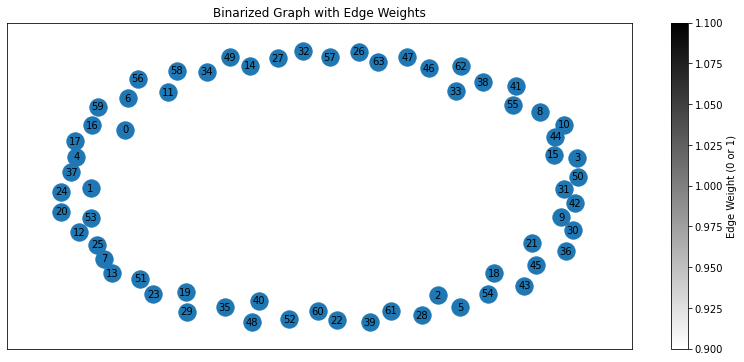

In [230]:
plt.figure(figsize=(14, 6))
pos = nx.spring_layout(Gbin, k=8)

# Extract edge weights
edge_weights = [data['weight'] for _, _, data in Gbin.edges(data=True)]

# Define colormap (you can adjust the colormap as needed)
cmap = plt.cm.binary

# Draw the graph with colored edges
nx.draw_networkx_nodes(Gbin, pos)
nx.draw_networkx_labels(Gbin, pos, font_size=10)
edge_colors = nx.draw_networkx_edges(Gbin, pos, edge_color=edge_weights, edge_cmap=cmap)

# Add color bar
cbar = plt.colorbar(edge_colors)
cbar.set_label('Edge Weight (0 or 1)')

save_path = os.path.join('images', 'binarized_graph.png')
plt.title('Binarized Graph with Edge Weights')
#plt.savefig(save_path)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'images\\contrast_correlation_graph.png'

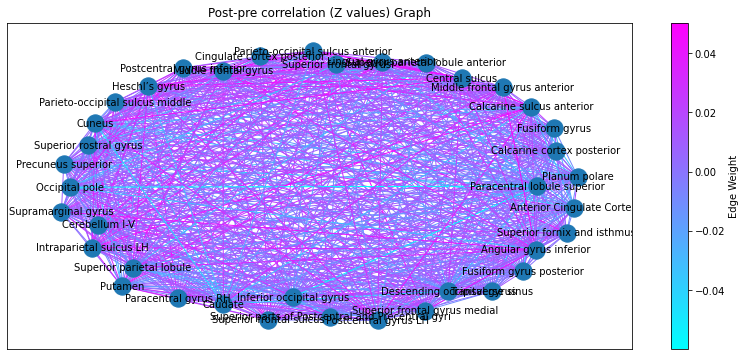

In [231]:
import matplotlib.cm as cm

# Collect node names for edges that meet the thresholds
nodes_to_keep = set()
for u, v, data in G.edges(data=True):
    if data['weight'] <= negative_threshold or data['weight'] >= positive_threshold:
        nodes_to_keep.add(u)
        nodes_to_keep.add(v)

# Create a subgraph with the filtered nodes
H = G.subgraph(nodes_to_keep)


plt.figure(figsize=(14, 6))
pos = nx.spring_layout(H, k=8)

# Extract edge weights
edge_weights = [data['weight'] for _, _, data in H.edges(data=True)]
min_edge_weight = min(edge_weights)
max_edge_weight = max(edge_weights)

# Define colormap
cmap = cm.get_cmap('cool')  # Choose a colormap

# Draw the subgraph with colored edges
nx.draw_networkx_nodes(H, pos)
nx.draw_networkx_labels(H, pos, font_size=10)
edge_colors = nx.draw_networkx_edges(H, pos, edge_color=edge_weights, edge_cmap=cmap)

# Add color bar
sm = cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_edge_weight, vmax=max_edge_weight))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Edge Weight')

save_path = os.path.join('images', 'contrast_correlation_graph.png')
plt.title('Post-pre correlation (Z values) Graph')
plt.savefig(save_path)
plt.show()

Graph metrics

Nodes sorted by degree (highest to lowest):
Cerebellum I-V: 1.1110612342329838
Heschl’s gyrus: 0.9528590674821997
Angular gyrus inferior: 0.9207130307000926
Middle frontal gyrus anterior: 0.9171056945772339
Superior frontal sulcus: 0.8554426784452507
Central sulcus: 0.8389504872719713
Middle frontal gyrus: 0.8334103355381641
Intraparietal sulcus LH: 0.8168898180280585
Superior frontal gyrus medial: 0.7808675029542922
Postcentral gyrus inferior: 0.7223445657053029
Parieto-occipital sulcus anterior: 0.6969003977916972
Calcarine sulcus anterior: 0.695410490804881
Paracentral gyrus RH: 0.6942078597744484
Parieto-occipital sulcus middle: 0.6814587819684689
Cingulate cortex posterior: 0.6587385718673738
Planum temporale: 0.6298239273161585
Callosomarginal sulcus: 0.5697892546750857
Inferior frontal gyrus: 0.5543433592237168
Precuneus anterior: 0.5477772175159263
Parieto-occipital sulcus superior: 0.5128525565081827
Cingulate gyrus mid-posterior: 0.5083267686947822
Superior occipital gyrus: 0

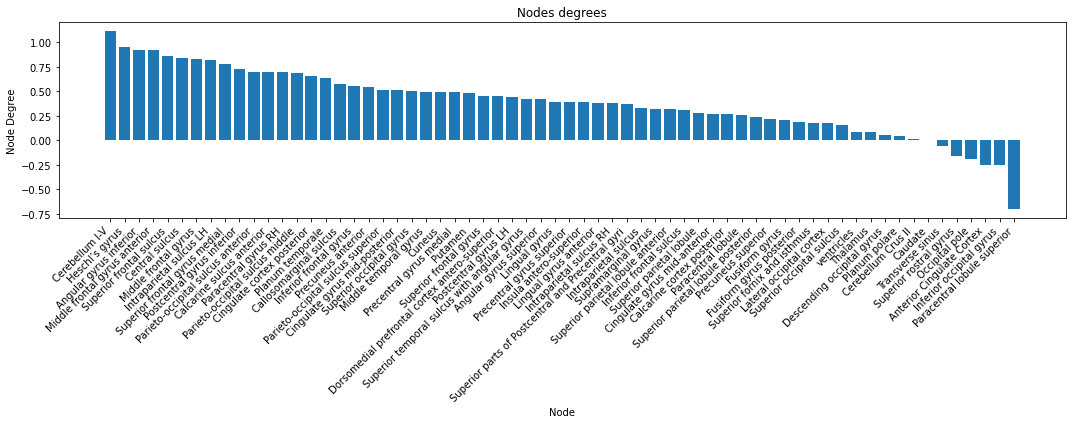

c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


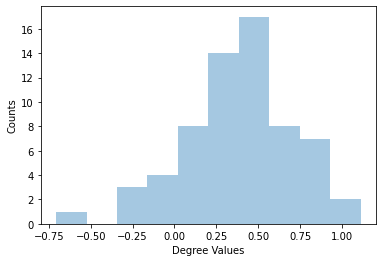

<Figure size 576x432 with 0 Axes>

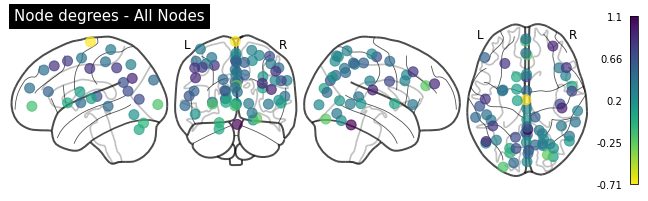

<Figure size 576x432 with 0 Axes>

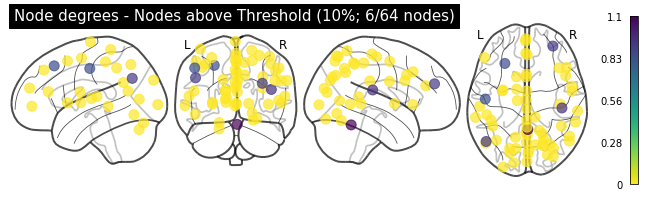

In [235]:
# (TangentZ) Mean graph DEGREE
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import plotting

# Compute the degree of the graph
degree = dict(G.degree(weight='weight'))

# Sort the nodes by degree (highest to lowest)
sorted_degree = sorted(degree.items(), key=lambda x: x[1], reverse=True)

# Get the highest 5% of nodes and their degree values
top_5_percent = int(len(sorted_degree) * 0.10)
highest_nodes = sorted_degree[:top_5_percent]

# Print all nodes and their degree values
print("Nodes sorted by degree (highest to lowest):")
for node_label, deg in sorted_degree:
    print(f"{node_label}: {deg}")
# Print the threshold value
threshold = highest_nodes[-1][1]
print(f"Threshold (highest 10%): {threshold}")

data = {
    'Node': [f"{node_label}" for node_label, deg in sorted_degree],
    'Degree': [deg for node_label, deg in sorted_degree],
}

df = pd.DataFrame(data)
#df.to_csv('connectivity_changes.csv', index=False)

plt.figure(figsize=(15, 6))
plt.bar(df['Node'], df['Degree'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Node')
plt.ylabel('Node Degree')
plt.title('Nodes degrees')
plt.tight_layout()

plt.show()
#------------------
# Degree Histogram
sns.distplot(list(degree.values()), kde=False, norm_hist=False)
plt.xlabel('Degree Values')
plt.ylabel('Counts')
plt.show()

# Plot the graph with degree values as the node markers
coords = plotting.find_probabilistic_atlas_cut_coords(atlas) 

# Plot the marker plot with all nodes
plt.figure(figsize=(8, 6))
plotting.plot_markers([degree[node] for node in G.nodes], coords, title='Node degrees - All Nodes', display_mode='lyrz')
plt.show()

# Replace degree values below threshold with 0
for node_label, deg in degree.items():
    if deg < threshold:
        degree[node_label] = 0

# Plot the marker plot with only nodes above the threshold
plt.figure(figsize=(8, 6))
plotting.plot_markers([degree[node] for node in G.nodes], coords, title='Node degrees - Nodes above Threshold (10%; 6/64 nodes)', display_mode='lyrz')
plt.show()



Nodes sorted by betweenness centrality (highest to lowest):
Insula antero-superior: 0.05427547363031234
Occipital pole: 0.03942652329749104
Inferior frontal gyrus: 0.03635432667690732
Superior frontal sulcus: 0.03533026113671275
Middle frontal gyrus anterior: 0.03533026113671275
Superior temporal sulcus with angular gyrus: 0.030209933435739886
Middle frontal gyrus: 0.02816180235535074
Superior frontal gyrus medial: 0.02713773681515617
Descending occipital gyrus: 0.026625704045058884
Postcentral gyrus inferior: 0.026625704045058884
Calcarine sulcus anterior: 0.023553507424475165
Postcentral gyrus LH: 0.022017409114183307
Supramarginal gyrus: 0.02048131080389145
Intraparietal sulcus RH: 0.019457245263696875
Superior rostral gyrus: 0.01894521249359959
Cerebellum I-V: 0.017409114183307733
Cingulate gyrus mid-anterior: 0.01638504864311316
Parieto-occipital sulcus middle: 0.014336917562724014
Inferior frontal sulcus: 0.014336917562724014
Caudate: 0.014336917562724014
Fusiform gyrus posterior

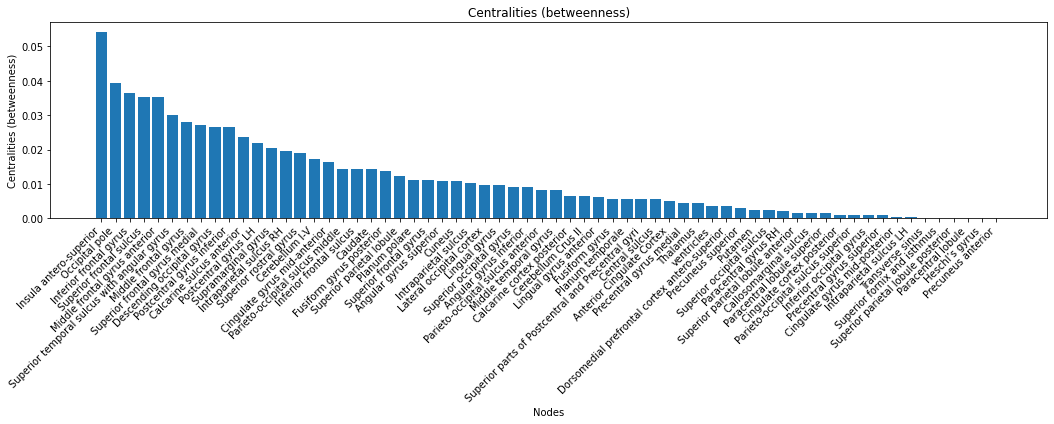

Threshold (highest 5%): 0.030209933435739886


c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


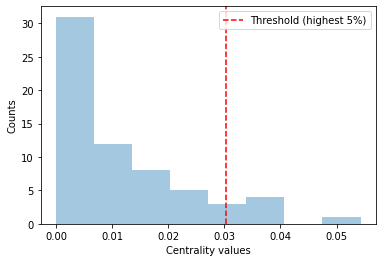

<Figure size 576x432 with 0 Axes>

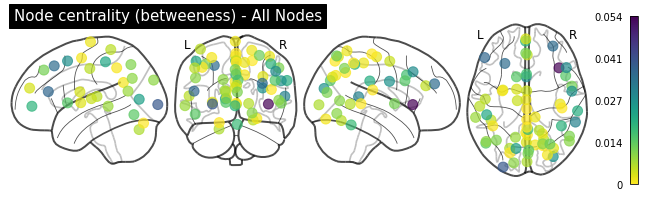

<Figure size 576x432 with 0 Axes>

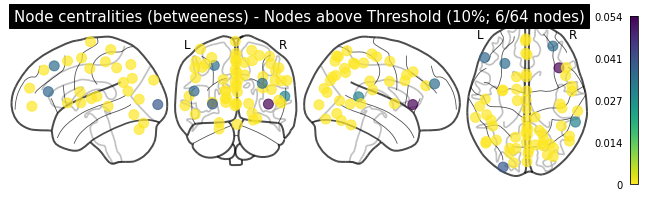

In [260]:
#betweness Centralities plots
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import plotting

# The function accepts a argument 'distance' that, in correlation-based networks, must be seen as the inverse ... 
# of the weight value. Thus, a high correlation value (e.g., 0.8) means a shorter distance (i.e., 0.2).
G_distance_dict = {(e1, e2): 1 / abs(weight) for e1, e2, weight in G.edges(data='weight')}
nx.set_edge_attributes(G, G_distance_dict, 'distance')

betweenness = nx.betweenness_centrality(G, weight='distance')
nx.set_node_attributes(G, betweenness, 'betwCentrality')

# Sort the nodes by betweenness centrality (highest to lowest)
sorted_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)

# Get the highest 5% of nodes and their centrality values
top_10_percent = int(len(sorted_betweenness) * 0.10)
highest_nodes = sorted_betweenness[:top_10_percent]

# Print all nodes and their betweenness centrality values
print("Nodes sorted by betweenness centrality (highest to lowest):")
for node_label, centrality in sorted_betweenness:
    print(f"{node_label}: {centrality}")

# Print the threshold value
threshold = highest_nodes[-1][1]
print(f"Threshold (highest 10%): {threshold}")

data = {
    'Node': [f"{node_label}" for node_label, cent in sorted_betweenness],
    'Centrality (betweenness)': [centrality for node, centrality in sorted_betweenness],
}
df = pd.DataFrame(data)
#--Distribution of betweenness centrality values over barplot
plt.figure(figsize=(15, 6))
plt.bar(df['Node'], df['Centrality (betweenness)'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Nodes')
plt.ylabel('Centralities (betweenness)')
plt.title('Centralities (betweenness)')
plt.tight_layout()
plt.show()

#---
threshold = highest_nodes[-1][1]
print(f"Threshold (highest 5%): {threshold}")

# betweenness Centrality Histogram
sns.distplot(list(betweenness.values()), kde=False, norm_hist=False)
plt.xlabel('Centrality values')
plt.ylabel('Counts')

# Plot the highest 5% values on the histogram
plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold (highest 5%)')
plt.legend()
plt.show()

# Plot the graph with betweenness centrality values as the node markers
coords = plotting.find_probabilistic_atlas_cut_coords(atlas) 

# Plot the marker plot with all nodes
plt.figure(figsize=(8, 6))
plotting.plot_markers([betweenness[node] for node in G.nodes], coords, title='Node centrality (betweeness) - All Nodes', display_mode='lyrz')
plt.show()

# Replace centrality values below threshold with 0
for node_label, centrality in betweenness.items():
    if centrality < threshold:
        betweenness[node_label] = 0

# Plot the marker plot with only nodes above the threshold
plt.figure(figsize=(8, 6))
plotting.plot_markers([betweenness[node] for node in G.nodes], coords, title='Node centralities (betweeness) - Nodes above Threshold (10%; 6/64 nodes)',  display_mode='lyrz')
plt.show()


Nodes sorted by closeness centrality (highest to lowest):
Inferior frontal gyrus: 0.1278631764523152
Insula antero-superior: 0.12427035607921272
Middle frontal gyrus anterior: 0.12354682701785545
Occipital pole: 0.12335186629843695
Superior frontal sulcus: 0.12308511825520452
Superior temporal sulcus with angular gyrus: 0.12211789936194269
Middle frontal gyrus: 0.12206932521590844
Supramarginal gyrus: 0.1214081370377138
Superior frontal gyrus medial: 0.12081183810034027
Descending occipital gyrus: 0.11990815372921204
Superior rostral gyrus: 0.11972042322999418
Inferior frontal sulcus: 0.11808961074535843
Postcentral gyrus LH: 0.11758448913693015
Planum polare: 0.1175368871103114
Postcentral gyrus inferior: 0.11750543267072473
Caudate: 0.11664879003811476
Cerebellum I-V: 0.11631890881638612
Calcarine sulcus anterior: 0.11627076937512129
Angular gyrus superior: 0.11602413673832065
Parieto-occipital sulcus middle: 0.11585017004807603
Intraparietal sulcus RH: 0.1146751277387411
Cingulate g

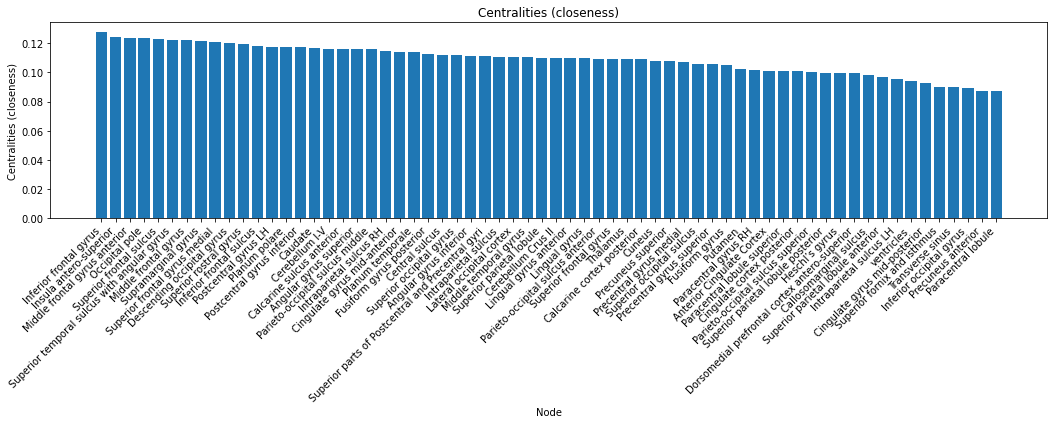

Threshold (highest 5%): 0.12211789936194269


c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


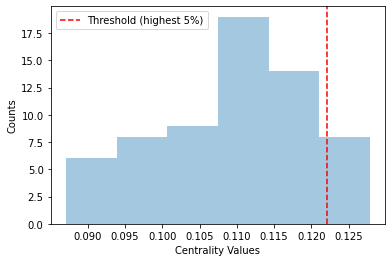

<Figure size 576x432 with 0 Axes>

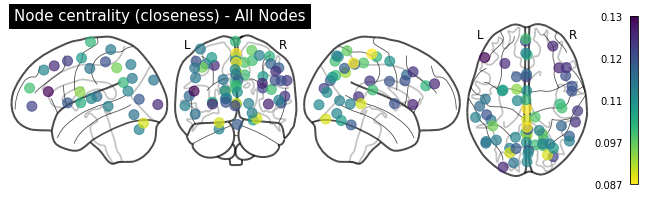

<Figure size 576x432 with 0 Axes>

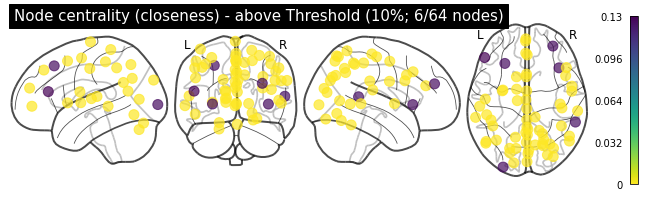

In [261]:
#closeness Centralities plots
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import plotting

# The function accepts a argument 'distance' that, in correlation-based networks, must be seen as the inverse ... 
# of the weight value. Thus, a high correlation value (e.g., 0.8) means a shorter distance (i.e., 0.2).
G_distance_dict = {(e1, e2): 1 / abs(weight) for e1, e2, weight in G.edges(data='weight')}
nx.set_edge_attributes(G, G_distance_dict, 'distance')
closeness = nx.closeness_centrality(G,distance='distance' )
nx.set_node_attributes(G, closeness, 'closecent')

# Sort the nodes by closeness centrality (highest to lowest)
sorted_closeness = sorted(closeness.items(), key=lambda x: x[1], reverse=True)

# Get the highest 5% of nodes and their centrality values
top_5_percent = int(len(sorted_closeness) * 0.10)
highest_nodes = sorted_closeness[:top_5_percent]

print("Nodes sorted by closeness centrality (highest to lowest):")
for node_label, centrality in sorted_closeness:
    print(f"{node_label}: {centrality}")

data = {
    'Node': [f"{node_label}" for node_label, cent in sorted_closeness],
    'Centrality (closeness)': [centrality for node, centrality in sorted_closeness],
}
df = pd.DataFrame(data)
#df.to_csv('connectivity_changes.csv', index=False)
plt.figure(figsize=(15, 6))
plt.bar(df['Node'], df['Centrality (closeness)'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Node')
plt.ylabel('Centralities (closeness)')
plt.title('Centralities (closeness)')
plt.tight_layout()

plt.show()


# Print the threshold value
threshold = highest_nodes[-1][1]
print(f"Threshold (highest 5%): {threshold}")

# Closeness Centrality Histogram
sns.distplot(list(closeness.values()), kde=False, norm_hist=False)
plt.xlabel('Centrality Values')
plt.ylabel('Counts')

# Plot the highest 5% values on the histogram
plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold (highest 5%)')
plt.legend()
plt.show()

# Plot the graph with closeness centrality values as the node markers
coords = plotting.find_probabilistic_atlas_cut_coords(atlas) 

# Plot the marker plot with all nodes
plt.figure(figsize=(8, 6))
plotting.plot_markers([closeness[node] for node in G.nodes], coords, title='Node centrality (closeness) - All Nodes', display_mode='lyrz')
plt.show()

# Replace centrality values below threshold with 0
for node_label, centrality in closeness.items():
    if centrality < threshold:
        closeness[node_label] = 0

# Plot the marker plot with only nodes above the threshold
plt.figure(figsize=(8, 6))
plotting.plot_markers([closeness[node] for node in G.nodes], coords, title='Node centrality (closeness) - above Threshold (10%; 6/64 nodes)',  display_mode='lyrz')
plt.show()


Nodes sorted by clustering coefficient (highest to lowest):
Superior parietal lobule: 0.01349620809912129
Lingual gyrus anterior: 0.01139695342853755
Superior parietal lobule anterior: 0.010515657344008627
Superior parietal lobule posterior: 0.010244756064678284
Calcarine cortex posterior: 0.00772632088893516
Paracentral lobule: 0.0077181609484558815
Parieto-occipital sulcus middle: 0.007356515855597979
Intraparietal sulcus: 0.006947309842466593
Cingulate gyrus mid-anterior: 0.006857942359615808
Inferior frontal gyrus: 0.005269314288602982
Middle frontal gyrus anterior: 0.004937112219098203
Cuneus: 0.004764693279264116
Angular gyrus inferior: 0.004588207696114379
Middle frontal gyrus: 0.004395480042772286
Paracentral lobule superior: 0.0026187922264263425
Paracentral gyrus RH: 0.0025393696904196404
Descending occipital gyrus: 0.001983359063981463
Lingual gyrus: 0.0017983923860111694
Planum temporale: 0.0017754015093273037
Postcentral gyrus LH: 0.0015476014305785299
Superior frontal gyr

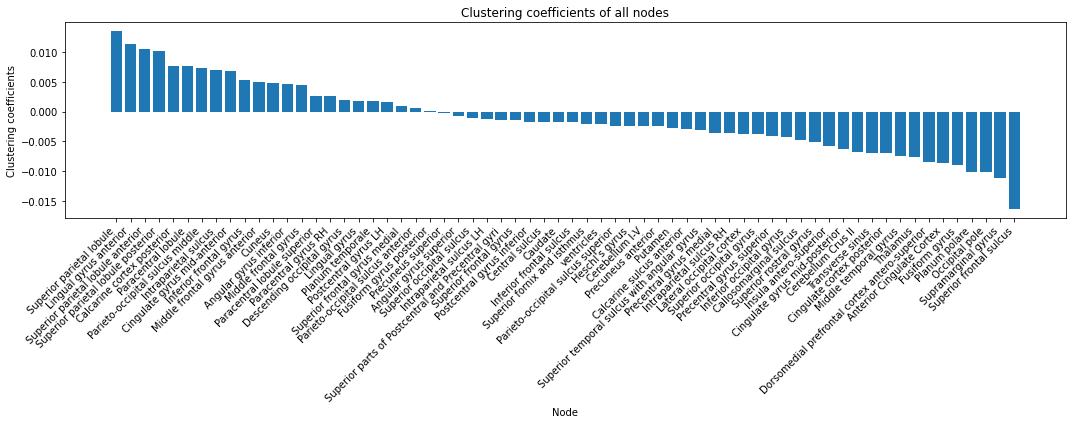

Threshold (highest 5%): 0.0077181609484558815


c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


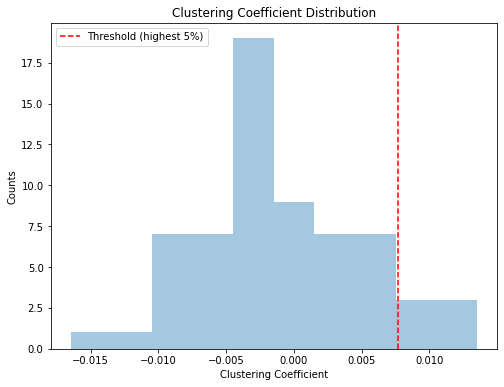

<Figure size 576x432 with 0 Axes>

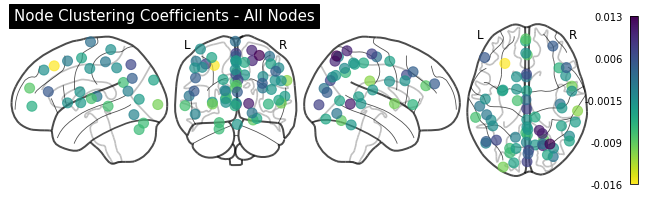

<Figure size 576x432 with 0 Axes>

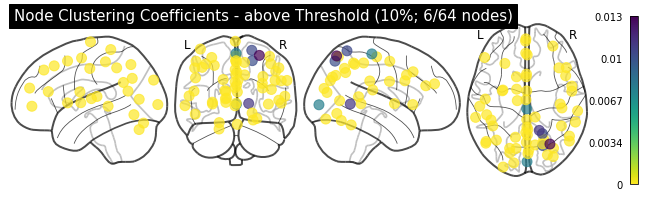

In [255]:
#Clustering coefficient
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import plotting

# Clustering Coefficient Calculation
clustering = nx.clustering(G, weight='weight')
nx.set_node_attributes(G, clustering, 'cc')

# Sort the nodes by clustering coefficient (highest to lowest)
sorted_clustering = sorted(clustering.items(), key=lambda x: x[1], reverse=True)

# Get the highest 5% of nodes and their clustering coefficients
top_5_percent = int(len(sorted_clustering) * 0.10)
highest_nodes = sorted_clustering[:top_5_percent]

# Print all nodes and their clustering coefficients
print("Nodes sorted by clustering coefficient (highest to lowest):")
for node_label, cc in sorted_clustering:
    print(f"{node_label}: {cc}")

data = {
    'Node': [f"{node_label}" for node_label, clust in sorted_clustering],
    'Clustering coefficient': [clust for node, clust in sorted_clustering],
}
df = pd.DataFrame(data)
#df.to_csv('connectivity_changes.csv', index=False)
plt.figure(figsize=(15, 6))
plt.bar(df['Node'], df['Clustering coefficient'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Node')
plt.ylabel('Clustering coefficients')
plt.title('Clustering coefficients of all nodes')
plt.tight_layout()

plt.show()

# Print the threshold value
threshold = highest_nodes[-1][1]
print(f"Threshold (highest 5%): {threshold}")

# Clustering Coefficient Histogram
plt.figure(figsize=(8, 6))
sns.distplot(list(clustering.values()), kde=False, norm_hist=False)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Counts')
plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold (highest 5%)')
plt.legend()
plt.title('Clustering Coefficient Distribution')
plt.show()

# Plot the graph with clustering coefficients as the node markers
coords = plotting.find_probabilistic_atlas_cut_coords(atlas) 

# Plot the marker plot with all nodes
plt.figure(figsize=(8, 6))
plotting.plot_markers([clustering[node] for node in G.nodes], coords, title='Node Clustering Coefficients - All Nodes',  display_mode='lyrz')
plt.show()

# Replace clustering coefficients values below threshold with 0
for node_label, cc in clustering.items():
    if cc < threshold:
        clustering[node_label] = 0

# Plot the marker plot with only nodes above the threshold
plt.figure(figsize=(8, 6))
plotting.plot_markers([clustering[node] for node in G.nodes], coords, title='Node Clustering Coefficients - above Threshold (10%; 6/64 nodes)',  display_mode='lyrz')
plt.show()


## 2.1 Intersubject predictions (correlation)

Producing Y having columns : ["total_chge_pain_hypAna", "Chge_hypnotic_depth", "Mental_relax_absChange", "Abs_diff_automaticity"]

In [239]:
# dependant variables 
xlsx_path = r'C:\Users\Dylan\Desktop\UM_Bsc_neurocog\E22\Projet_Ivado_rainvillelab\test_dataset\test_data_ASL\Hypnosis_variables_20190114_pr_jc.xlsx'
rawY = pd.read_excel(xlsx_path, sheet_name=0, index_col=1, header=2).iloc[2:, [4, 17,18, 19, 38, 48,65, 67]]
rawY.columns= ['SHSS_score', 'raw_change_ANA','raw_change_HYPER', "total_chge_pain_hypAna", "Chge_hypnotic_depth", "Mental_relax_absChange", 'Automaticity_post_ind',"Abs_diff_automaticity"]

cleanY = rawY.iloc[:-6,:] # remove sub04, sub34 and last 6 rows
cutY = cleanY.drop(['APM04*', 'APM34*'])

filledY = cutY.fillna(cutY.astype(float).mean()).astype(float)
filledY['SHSS_groups'] = pd.cut(filledY['SHSS_score'], bins=[0, 4, 8, 12], labels=['0', '1', '2']) # encode 3 groups for SHSS scores


#bin_edges = np.linspace(min(data_column), max(data_column), 4) # 4 bins
filledY['auto_groups'] = pd.cut(filledY['Abs_diff_automaticity'],
                               bins=np.linspace(min(filledY['Abs_diff_automaticity'])
                               - 1e-10,
                                                max(filledY['Abs_diff_automaticity']) + 1e-10, 4),
                               labels=['0', '1', '2'])

# reorder to match order on elm server
new_order = ['APM01', 'APM16', 'APM06', 'APM38', 'APM12', 'APM03', 'APM07', 'APM28', 'APM29', 'APM17', 'APM11', 'APM02',
             'APM15', 'APM05', 'APM32', 'APM42', 'APM35', 'APM43', 'APM41', 'APM08', 'APM36', 'APM27', 'APM33', 'APM22',
             'APM20', 'APM09', 'APM37', 'APM26', 'APM47', 'APM46', 'APM40']
#reorder to match elm server order
Y = pd.DataFrame(columns=filledY.columns)
for name in new_order:
    row = filledY.loc[name]
    Y.loc[name] = row



In [240]:
# Diff automaticity groups col
filledY['auto_groups'] = pd.to_numeric(filledY['auto_groups'], errors='coerce')

# Calculate unique values and their counts
unique_values, value_counts = np.unique(filledY['auto_groups'], return_counts=True)

for value, count in zip(unique_values, value_counts):
    print(f"Value: {value}, Count: {count}")


Value: 0, Count: 8
Value: 1, Count: 15
Value: 2, Count: 8


======= SHSS_score =======


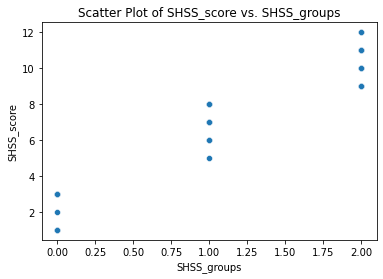

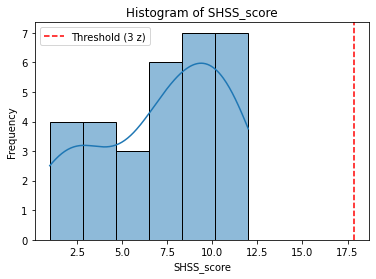

No extreme scores found.
-------------------


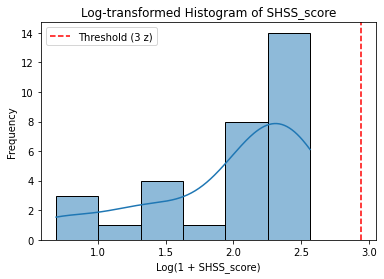

======= raw_change_ANA =======


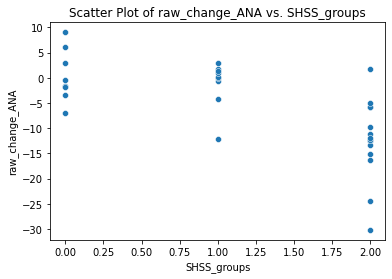

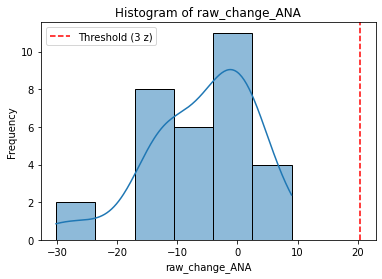

No extreme scores found.
-------------------


c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


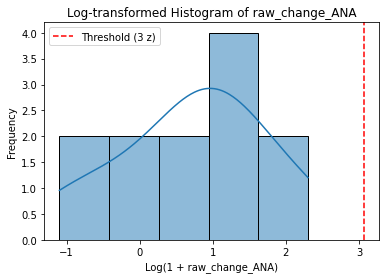

======= raw_change_HYPER =======


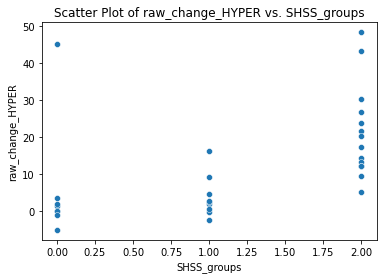

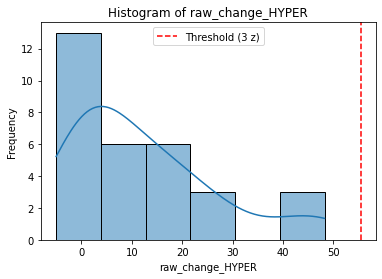

No extreme scores found.
-------------------


c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


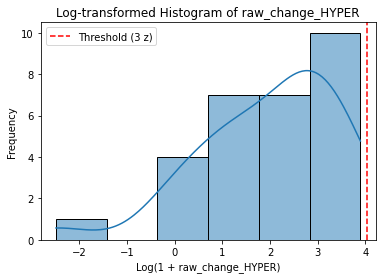

======= total_chge_pain_hypAna =======


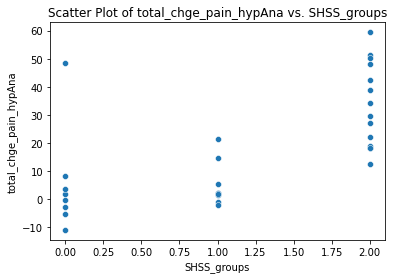

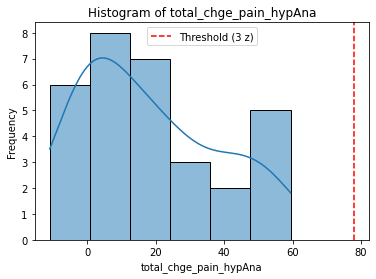

No extreme scores found.
-------------------


c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


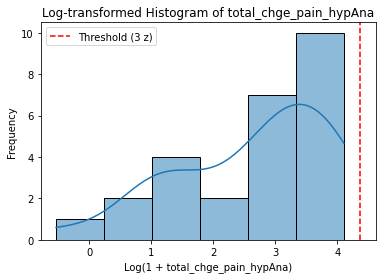

======= Chge_hypnotic_depth =======


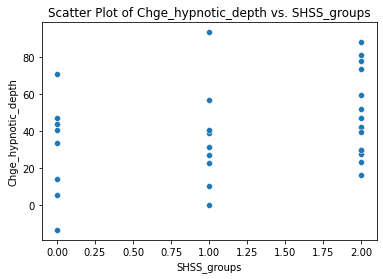

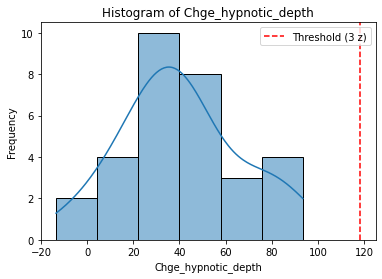

No extreme scores found.
-------------------


c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


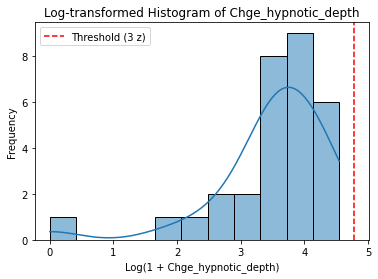

======= Mental_relax_absChange =======


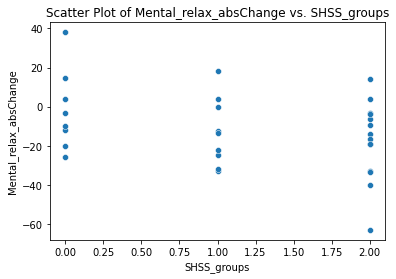

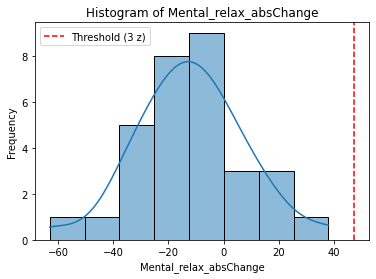

No extreme scores found.
-------------------


c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


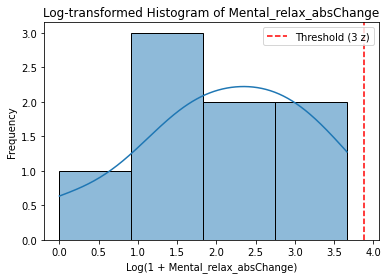

======= Automaticity_post_ind =======


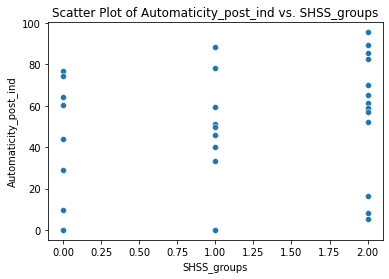

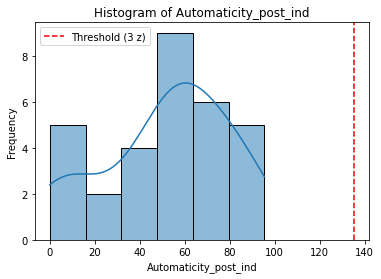

No extreme scores found.
-------------------


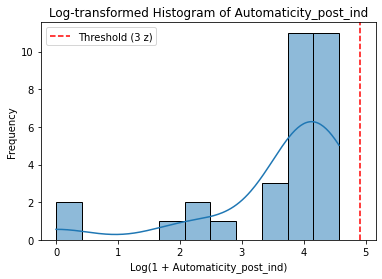

======= Abs_diff_automaticity =======


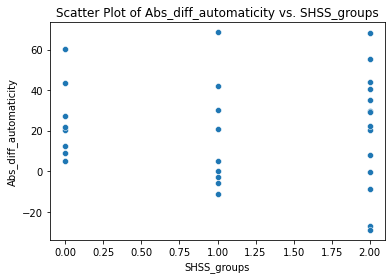

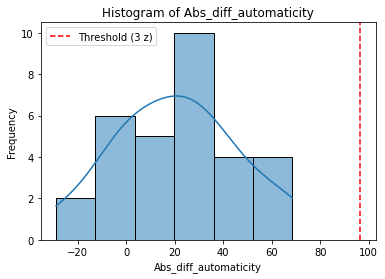

No extreme scores found.
-------------------


c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


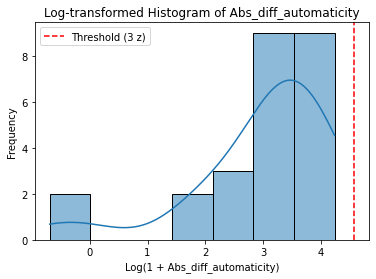

======= SHSS_groups =======


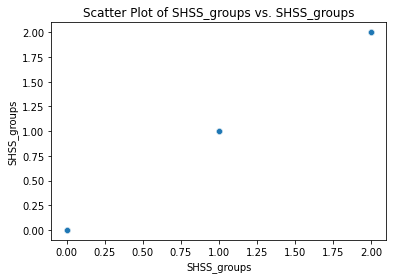

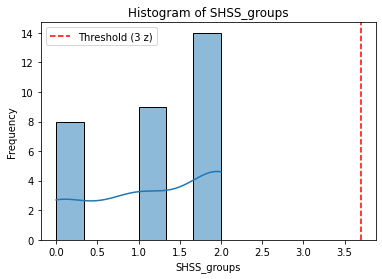

No extreme scores found.
-------------------


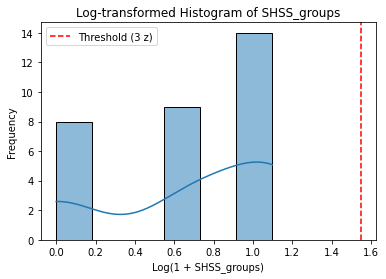

======= auto_groups =======


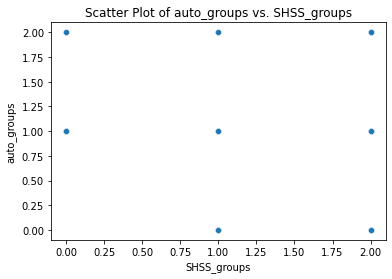

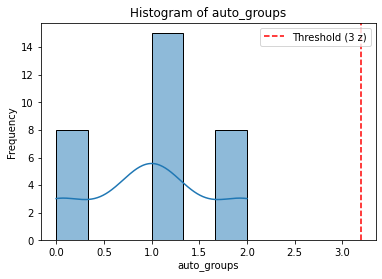

No extreme scores found.
-------------------


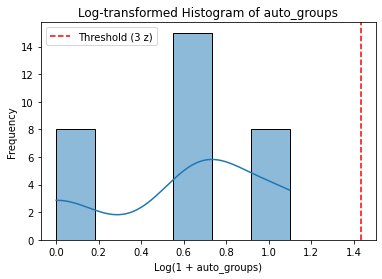

In [241]:
# check linearity of VD
Y = Y.apply(pd.to_numeric, errors='coerce')
Y = Y.dropna()

# Compute z-scores for each dependent variable
z_scores = (Y - Y.mean()) / Y.std()

# Set the threshold for extreme scores
z_threshold = 3

# Iterate through each dependent variable
for column in Y.columns:
    print(f"======= {column} =======")

    # Scatter plot of the dependent variable against SHSS_groups
    sns.scatterplot(data=Y, x='SHSS_groups', y=column)
    plt.xlabel('SHSS_groups')
    plt.ylabel(column)
    plt.title(f"Scatter Plot of {column} vs. SHSS_groups")
    plt.show()

    # Histogram of the dependent variable
    sns.histplot(Y[column], kde=True)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f"Histogram of {column}")
    plt.axvline(x=Y[column].mean() + z_threshold * Y[column].std(), color='red', linestyle='--', label=f'Threshold ({z_threshold} z)')
    plt.legend()
    plt.show()

    # Check for extreme scores with z values > 3
    extreme_scores = Y[np.abs(z_scores[column]) > z_threshold]
    if len(extreme_scores) > 0:
        print(f"Extreme Scores (> {z_threshold} z) for {column}:")
        print(extreme_scores)
    else:
        print("No extreme scores found.")

    print("-------------------")

    # Log-transformed histogram
    log_transformed_column = np.log1p(Y[column])
    sns.histplot(log_transformed_column, kde=True)
    plt.xlabel(f'Log(1 + {column})')
    plt.ylabel('Frequency')
    plt.title(f"Log-transformed Histogram of {column}")
    plt.axvline(x=np.log1p(Y[column].mean() + z_threshold * Y[column].std()), color='red', linestyle='--', label=f'Threshold ({z_threshold} z)')
    plt.legend()
    plt.show()


Initializing dict (Gs) with each subject's graph (len 31)

In [242]:
# Single-subject graphs
print(results.keys())
As = [results['contrast_connectomes'][i] for i in range(len(results['contrast_connectomes']))]

rawGs = {nx.from_numpy_matrix(A, create_using=nx.Graph) for A in As}
rawGs = {nx.relabel_nodes(G, dict(zip(range(len(G.nodes())),labels))) for G in rawGs}

# add keys to make it a dict instead od a set
Gs = dict()
for name, G in zip(Y.index,rawGs): 
    Gs[name] = G
    #Gs[].edges(data=True)
print(Gs)


dict_keys(['pre_series', 'post_series', 'seed_pre_series', 'seed_post_series', 'seed_to_pre_correlations', 'seed_to_post_correlations', 'pre_connectomes', 'pre_mean_connectome', 'post_connectomes', 'post_mean_connectome', 'zcontrast_mean_connectome', 'contrast_connectomes', 'mean_seed_pre_connectome', 'mean_seed_post_connectome', 'mean_seed_contrast_connectome', 'preX', 'postX', 'contrastX'])
{'APM01': <networkx.classes.graph.Graph object at 0x000001E10FC31810>, 'APM16': <networkx.classes.graph.Graph object at 0x000001E10FC31840>, 'APM06': <networkx.classes.graph.Graph object at 0x000001E10FC318A0>, 'APM38': <networkx.classes.graph.Graph object at 0x000001E10FC308B0>, 'APM12': <networkx.classes.graph.Graph object at 0x000001E10FC31900>, 'APM03': <networkx.classes.graph.Graph object at 0x000001E10FC30940>, 'APM07': <networkx.classes.graph.Graph object at 0x000001E10FC31990>, 'APM28': <networkx.classes.graph.Graph object at 0x000001E10FC31AE0>, 'APM29': <networkx.classes.graph.Graph obje

Degree and centrality per participant's graph

In [243]:
for participant, graph in Gs.items():
    strength = graph.degree(weight='weight')
    strengths = {node: val for (node, val) in strength}
    nx.set_node_attributes(graph, strengths, 'strength')

    norm_strengths = {node: val * 1/(len(graph.nodes)-1) for (node, val) in strength}
    nx.set_node_attributes(graph, norm_strengths, 'strengthnorm')

# centrality
for participant, G in Gs.items():
    G_distance_dict = {(e1, e2): 1 / abs(weight) for e1, e2, weight in G.edges(data='weight')}
    nx.set_edge_attributes(G, G_distance_dict, 'distance')
    closeness = nx.betweenness_centrality (G, weight='distance')

    # Now we add the closeness centrality value as an attribute to the nodes
    nx.set_node_attributes(G, closeness, 'betcent')

# centrality
for participant, G in Gs.items():
    G_distance_dict = {(e1, e2): 1 / abs(weight) for e1, e2, weight in G.edges(data='weight')}
    nx.set_edge_attributes(G, G_distance_dict, 'distance')
    closeness = nx.closeness_centrality (G, distance='distance')

    # Now we add the closeness centrality value as an attribute to the nodes
    nx.set_node_attributes(G, closeness, 'closecent')


for participant, graph in Gs.items():
    # Compute the clustering coefficient
    clust = nx.clustering(graph, weight='weight')

    # Add the clustering coefficient as a node attribute
    nx.set_node_attributes(graph, clust, 'clustering')

    




Creating X_degree feature matrix of shape N x nb. nodes : 31 x 64

In [244]:
participant_names = list(Gs.keys())
node_names = list(Gs[participant_names[0]].nodes())

X_con = results['contrastX'] 
print(X_con.shape)
X_degree = np.zeros((len(participant_names), len(node_names)))
# Fill the features matrix with degree strength values
for i, participant in enumerate(participant_names):
    graph = Gs[participant]
    degrees = nx.get_node_attributes(graph, 'strengthnorm')
    for j, node in enumerate(node_names):
        X_degree[i, j] = degrees[node]

print(X_degree.shape)


X_centrality = np.zeros((len(participant_names), len(node_names)))
# Fill the features matrix with degree strength values
for i, participant in enumerate(participant_names):
    graph = Gs[participant]
    centrality = nx.get_node_attributes(graph, 'closecent')
    for j, node in enumerate(node_names):
        X_centrality[i, j] = centrality[node]

print(X_centrality.shape)

X_clustering = np.zeros((len(participant_names), len(node_names)))
# Fill the features matrix with degree strength values
for i, participant in enumerate(participant_names):
    graph = Gs[participant]
    clustering = nx.get_node_attributes(graph, 'clustering')
    for j, node in enumerate(node_names):
        X_clustering[i, j] = clustering[node]

print(X_clustering.shape)


(31, 2016)
(31, 64)
(31, 64)
(31, 64)


SVR prediction for ["Abs_chge_pain_hypAna", "Chge_hypnotic_depth", "Mental_relax_absChange", "Abs_diff_automaticity"]

In [245]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, ShuffleSplit
from sklearn.svm import SVR
target_columns = ['SHSS_score', 'raw_change_ANA','raw_change_HYPER',"total_chge_pain_hypAna", "Chge_hypnotic_depth", "Mental_relax_absChange", "Abs_diff_automaticity"]

for features_matrix, g_metric in zip([X_con, X_degree, X_centrality, X_clustering], ['connectivity_matrix', 'Degree', 'Centrality', 'clustering']):
    print('================ \n{}\n================'.format(g_metric))
    for target_column in target_columns:
        print(f"--- {target_column} ---")

        # Select the target column for prediction
        y = Y[target_column].values

        # Initialize SVR model
        svr = SVR()

        # Define the hyperparameter grid
        param_grid = {
            'C': [0.1, 1, 10],
            'epsilon': [0.1, 0.2, 0.3],
            'kernel': ['linear', 'rbf']
        }

        # Perform k-fold cross-validation with hyperparameter tuning
        k = 5  # Number of folds
        kf = KFold(n_splits=k, shuffle=True, random_state=42)

        grid_search = GridSearchCV(svr, param_grid, cv=kf)
        grid_search.fit(features_matrix, y)

        # Get the best SVR model
        best_svr = grid_search.best_estimator_
        print('SVR best params : ', best_svr)
        # Perform cross-validation on the best model
        mse_scores = cross_val_score(best_svr, features_matrix, y, scoring='neg_mean_squared_error', cv=kf)
        mae_scores = cross_val_score(best_svr, features_matrix, y, scoring='neg_mean_absolute_error', cv=kf)
        r2_scores = cross_val_score(best_svr, features_matrix, y, scoring='r2', cv=kf)

        # Calculate mean performance metrics across all folds
        mean_mse = -np.mean(mse_scores)
        mean_mae = -np.mean(mae_scores)
        mean_r2 = np.mean(r2_scores)
        
        # Print the mean performance metrics
        print("Mean MSE:", mean_mse)
        print("Mean MAE:", mean_mae)
        print("Mean R^2:", mean_r2)
        print("---")


connectivity_matrix
--- SHSS_score ---


SVR best params :  SVR(C=1, epsilon=0.3)
Mean MSE: 13.542221410970905
Mean MAE: 3.0446515782280494
Mean R^2: -0.3902025726664819
---
--- raw_change_ANA ---
SVR best params :  SVR(C=10, kernel='linear')
Mean MSE: 73.11921705887654
Mean MAE: 6.584326724803465
Mean R^2: 0.00539529802057459
---
--- raw_change_HYPER ---
SVR best params :  SVR(C=10, epsilon=0.3)
Mean MSE: 218.81496257816008
Mean MAE: 11.034824511438503
Mean R^2: -0.11087112818359683
---
--- total_chge_pain_hypAna ---
SVR best params :  SVR(C=0.1, kernel='linear')
Mean MSE: 402.5044589523865
Mean MAE: 16.73411969774249
Mean R^2: -0.09252199408137265
---
--- Chge_hypnotic_depth ---
SVR best params :  SVR(C=0.1)
Mean MSE: 731.289533319882
Mean MAE: 21.678835419564738
Mean R^2: -0.5221904448921524
---
--- Mental_relax_absChange ---
SVR best params :  SVR(C=10, epsilon=0.3, kernel='linear')
Mean MSE: 392.82241063272005
Mean MAE: 15.264768407594849
Mean R^2: -0.231004956862679
---
--- Abs_diff_automaticity ---
SVR best params :  S

In [246]:
def reg_plot_performance(y_test, y_pred, target_name, mean_pearson_r, mean_rmse, mean_mae, mean_r2,mean_comp, title = '', path_output='', filename='regplot'):
    """
    Plot the regression plot associated with the model performance. One regression line will be plotted per fold.

    Parameters
    ----------
    y_test: list
        list containing the values of y in the test set for each fold
    y_pred: list
        list containing the values of the predicted y for each fold
    target_name: string
        name of the target variable (Y-axis label)
    mean_pearson_r: float
        mean Pearson's R value
    mean_rmse: float
        mean RMSE value
    mean_mae: float
        mean MAE value
    mean_r2: float
        mean R^2 value
    path_output: string
        path for saving the output
    filename: string
        name of the output file

    Code adapted from https://github.com/mpcoll/coll_painvalue_2021/tree/main/figures
    """
    import matplotlib.ticker as ticker

    blue_palette_10 = sns.color_palette("Blues", 10)
    fig1, ax1 = plt.subplots(figsize=(5, 5))
    ax1.set_xlim([min([min(y) for y in y_test]), max([max(y) for y in y_test])])
    ax1.set_ylim([min([min(y) for y in y_test]), max([max(y) for y in y_test])])
    for idx, elem in enumerate(y_test):
        df = pd.DataFrame(list(zip(elem, y_pred[idx])), columns=['Y_true', 'Y_pred'])
        sns.regplot(data=df, x='Y_true', y='Y_pred',
                    ci=None, scatter=False, color=blue_palette_10[idx],
                    ax=ax1, line_kws={'linewidth': 1.4}, truncate=False)
        ax1.xaxis.set_major_locator(ticker.AutoLocator())
        ax1.yaxis.set_major_locator(ticker.AutoLocator())
    plt.xlabel(target_name)
    plt.ylabel('Cross-validated prediction')
    for axis in ['top', 'bottom', 'left', 'right']:
        ax1.spines[axis].set_linewidth(2.6)
    ax1.tick_params(width=2.6, direction='out', length=10)
    plt.title(title)
   

    # Add metrics at the bottom
    metrics_text = f"Mean Pearson's R: {mean_pearson_r:.4f}\nMean RMSE: {mean_rmse:.4f}\nMean MAE: {mean_mae:.4f}\nMean R^2: {mean_r2:.4f}\nMean components: {mean_comp}"
    plt.text(0.75, 0.05, metrics_text, ha='center', transform=ax1.transAxes, fontsize=10)
      


    plt.show()

In [247]:
X_con = np.log10(X_con + 1)
X_degree = np.log10(X_degree + 1)
X_centrality = np.log10(X_centrality + 1)
X_clustering = np.log10(X_clustering + 1)

connectivity_matrix
--- SHSS_score ---


c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


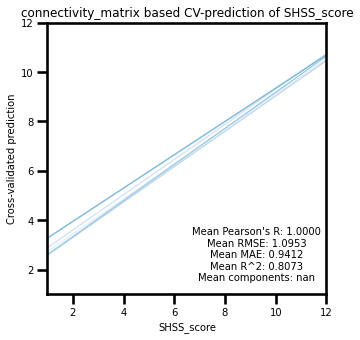

--- raw_change_ANA ---


c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


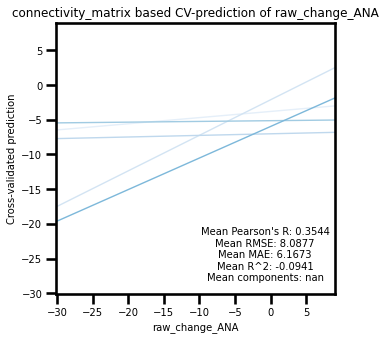

--- raw_change_HYPER ---


c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


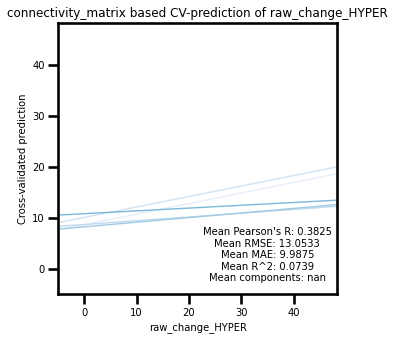

--- total_chge_pain_hypAna ---


c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


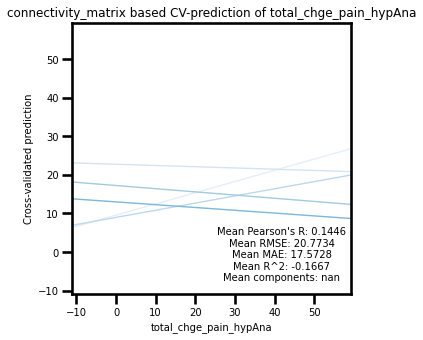

--- Chge_hypnotic_depth ---


c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


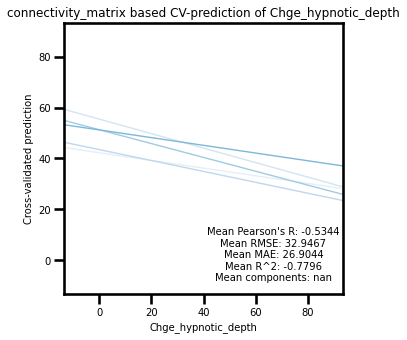

--- Mental_relax_absChange ---


c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


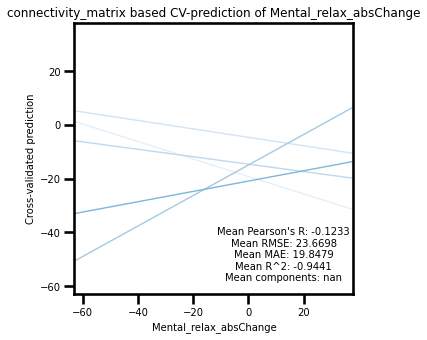

--- Abs_diff_automaticity ---


c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


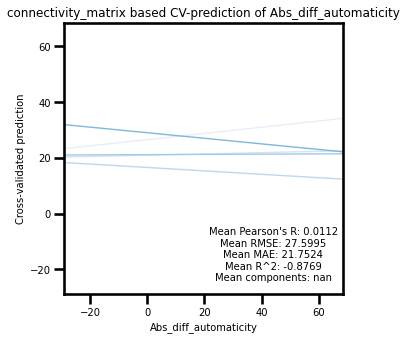

Degree
--- SHSS_score ---


c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


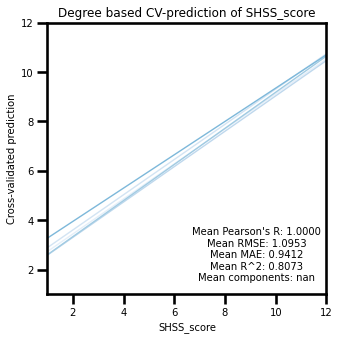

--- raw_change_ANA ---


c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


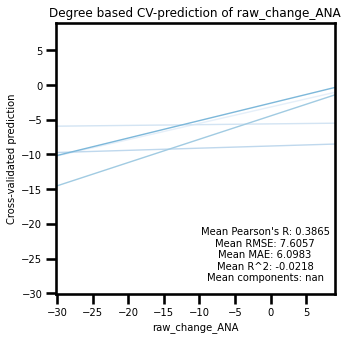

--- raw_change_HYPER ---


c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


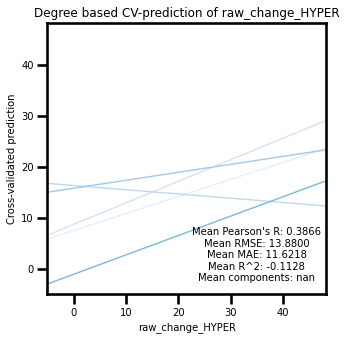

--- total_chge_pain_hypAna ---


c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


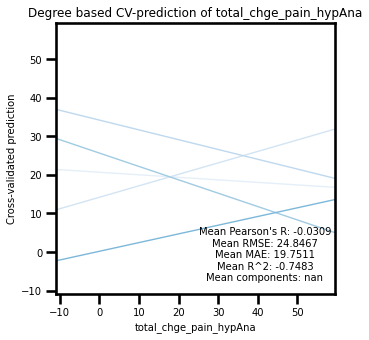

--- Chge_hypnotic_depth ---


c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


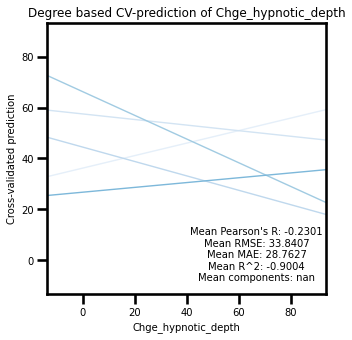

--- Mental_relax_absChange ---


c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


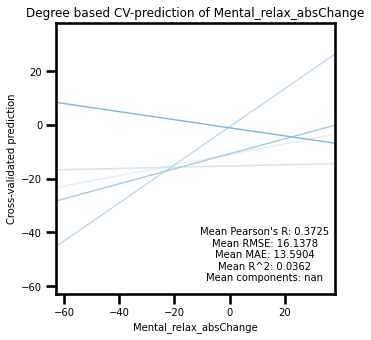

--- Abs_diff_automaticity ---


c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.064e+00, tolerance: 1.571e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


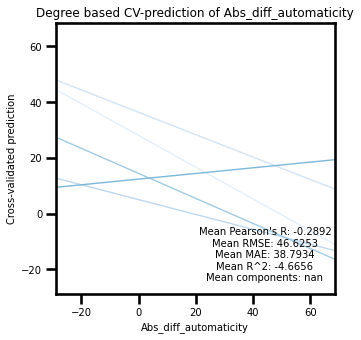

Centrality
--- SHSS_score ---


c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


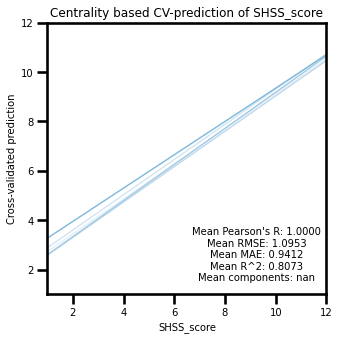

c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


--- raw_change_ANA ---


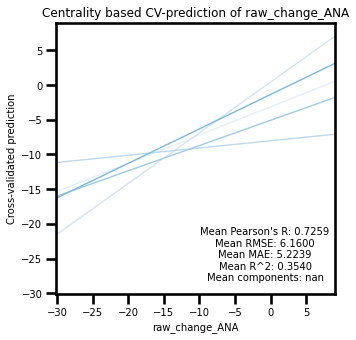

--- raw_change_HYPER ---


c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


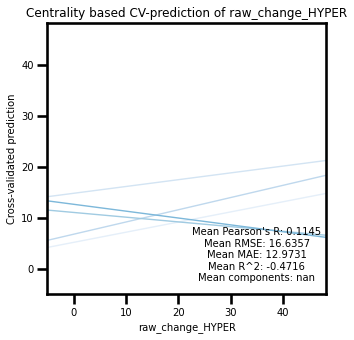

--- total_chge_pain_hypAna ---


c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


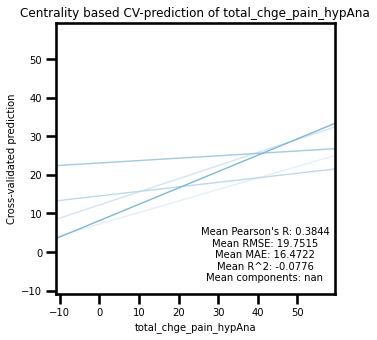

--- Chge_hypnotic_depth ---


c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


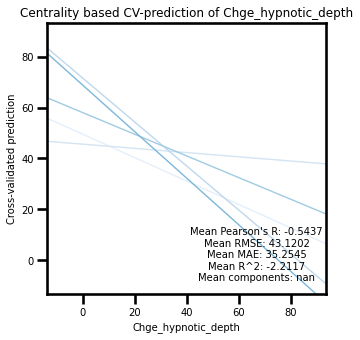

--- Mental_relax_absChange ---


c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


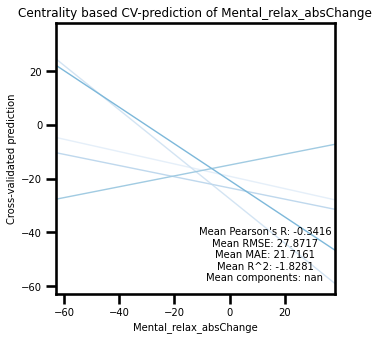

c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


--- Abs_diff_automaticity ---


c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


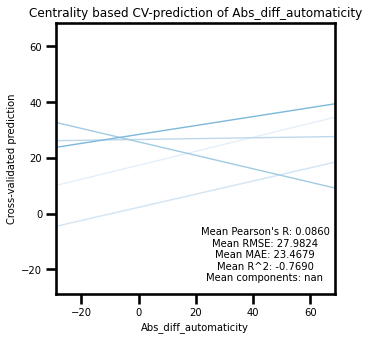

clustering
--- SHSS_score ---


c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


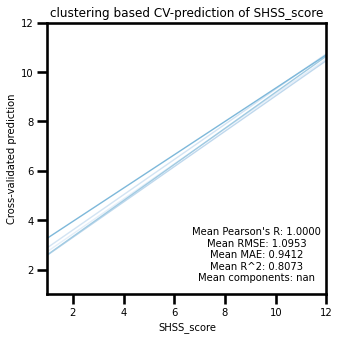

--- raw_change_ANA ---


c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


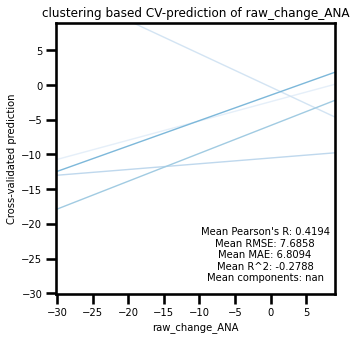

--- raw_change_HYPER ---


c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


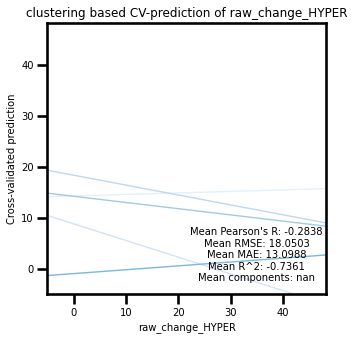

--- total_chge_pain_hypAna ---


c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


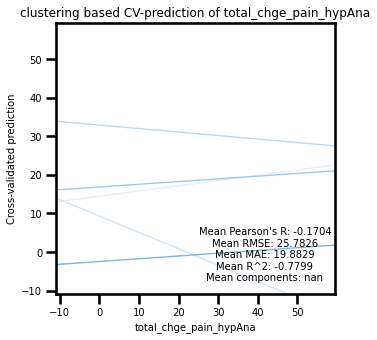

--- Chge_hypnotic_depth ---


c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


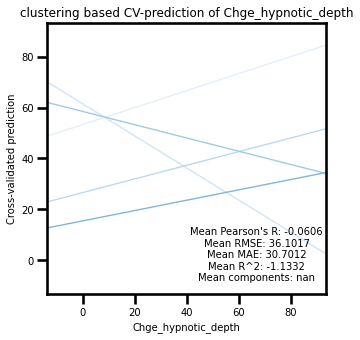

--- Mental_relax_absChange ---


c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


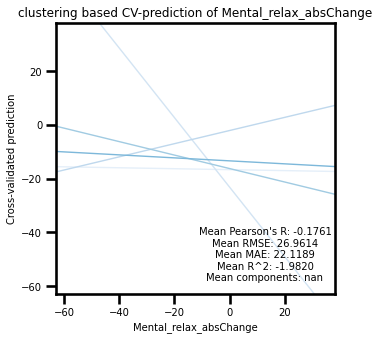

--- Abs_diff_automaticity ---


c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


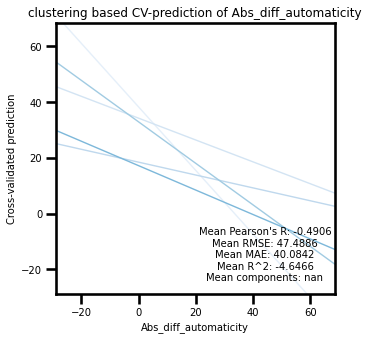

In [248]:
#Ridge regression with cross-validation
from sklearn.cross_decomposition import PLSRegression
from scipy.stats import pearsonr
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.decomposition import PCA
from sklearn.model_selection import ShuffleSplit, GridSearchCV, KFold, StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, QuantileTransformer, PowerTransformer
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.linear_model import RidgeCV


for features_matrix, g_metric in zip([X_con, X_degree, X_centrality, X_clustering], ['connectivity_matrix', 'Degree', 'Centrality', 'clustering']):
    print('================ \n{}\n================'.format(g_metric))
    
    #features_matrix = np.log10(features_matrix + 1)  # Add 1 to avoid log(0)
    features_matrix = np.hstack((features_matrix, Y['SHSS_score'].values.reshape(-1, 1)))
    #features_matrix = np.hstack((features_matrix, Y['Abs_diff_automaticity'].values.reshape(-1, 1)))
    
    for target_column in target_columns:
        print(f"--- {target_column} ---")
        y_preds = []
        y_tests = []
        y = Y[target_column].values
        #y_pipeline = Pipeline([('std', QuantileTransformer(n_quantiles=31)),('power', PowerTransformer())])
        #y = y_pipeline.fit_transform(y.reshape(-1,1)).ravel()
            
    
        pipeline = Pipeline([('std', StandardScaler()),('ridge', Lasso())])

        k = 5 # Number of folds
        #kf = ShuffleSplit(n_splits=k,test_size=0.20,random_state=4)
        kf = KFold(n_splits=k, random_state=4, shuffle=True)

        pearson_r_scores = []
        r2_scores = []
        mae_scores = []
        mse_scores = []
        rmse_scores = []
        n_components = []
        for train_index, test_index in kf.split(features_matrix):
            # Split the data into train and test sets based on the current fold
            X_train, X_test = features_matrix[train_index], features_matrix[test_index]
            y_train, y_test = y[train_index], y[test_index]

            # Fit pipeline model with best hyperparameters
            pipeline.fit(X_train, y_train)
            
            y_pred = pipeline.predict(X_test)
            y_preds.append(y_pred)
            y_tests.append(y_test)

            # Calculate evaluation metrics
            pearson_r, _ = pearsonr(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)

            # Append metrics to the respective lists
            pearson_r_scores.append(pearson_r)
            r2_scores.append(r2)
            mae_scores.append(mae)
            mse_scores.append(mse)
            rmse_scores.append(rmse)
            #n_components.append(pipeline.named_steps['pca'].n_components_)
        
        # Calculate mean metrics across all folds
        mean_pearson_r = np.mean(pearson_r_scores)
        mean_r2 = np.mean(r2_scores)
        mean_mae = np.mean(mae_scores)
        mean_mse = np.mean(mse_scores)
        mean_rmse = np.mean(rmse_scores)
        mean_n_components = np.mean(n_components)
               # Title for the plot
        plot_title = f"{g_metric} based CV-prediction of {target_column}"

        reg_plot_performance(y_tests, y_preds, target_column, mean_pearson_r, mean_rmse, mean_mae, mean_r2, mean_n_components, title = plot_title)
        



In [249]:
#Regular OLS model
from sklearn import datasets, linear_model
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, ShuffleSplit
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import fdrcorrection   
import statsmodels.api as sm

y_col = ["Abs_chge_pain_hypAna", "Chge_hypnotic_depth", "Mental_relax_absChange", "Abs_diff_automaticity"]


for col in y_col:
    y = Y[target_column].values
    x = PCA(n_components=10).fit_transform(X_con)
    lin_reg = sm.OLS(y, sm.add_constant(x)).fit()
    #lin_reg_log = sm.OLS(y_log, x_constant).fit()
    lin_reg_wls = sm.WLS(y, sm.add_constant(x)).fit()
    
    ols_res = lin_reg.summary()
    print(col, '\n-----------',ols_res)
    corr_ps = fdrcorrection(lin_reg.pvalues)[0]
    for i in range(len(corr_ps)):
        if corr_ps[i] == True:
            print('Feature', i, 'is significant with FDR correction')
    model = SVR()
    ss = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
    print(cross_val_score(model, x, y, cv=ss))

        


Abs_chge_pain_hypAna 
-----------                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     2.418
Date:                Thu, 24 Aug 2023   Prob (F-statistic):             0.0445
Time:                        13:51:06   Log-Likelihood:                -131.47
No. Observations:                  31   AIC:                             284.9
Df Residuals:                      20   BIC:                             300.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.4

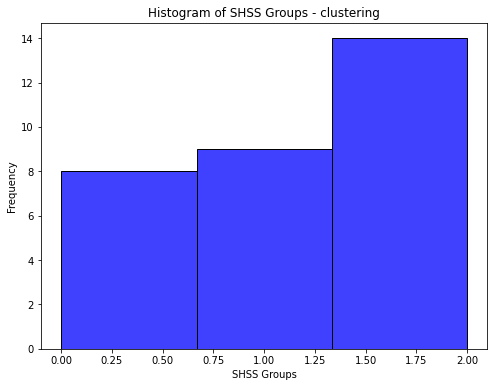

c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

scores : [0.28571429 0.33333333 0.5        0.33333333 0.5       ]
--- connectome ---
Accuracy: 0.3548
Precision: 0.3604
Recall: 0.3548
F1-score: 0.3491
Confusion Matrix:


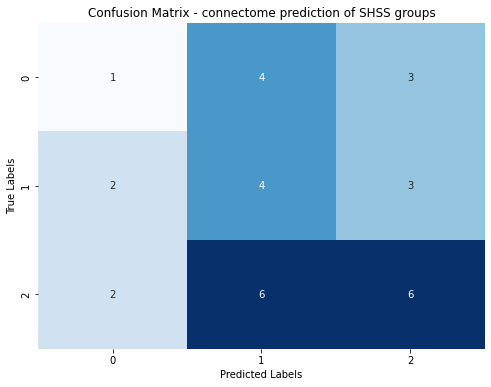

scores : [0.57142857 0.33333333 0.5        0.16666667 0.66666667]
--- Degree ---
Accuracy: 0.4194
Precision: 0.4082
Recall: 0.4194
F1-score: 0.4091
Confusion Matrix:


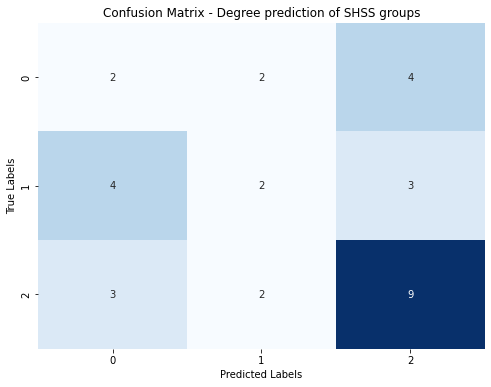

scores : [0.42857143 0.16666667 0.5        0.16666667 0.33333333]
--- Centrality ---
Accuracy: 0.3548
Precision: 0.3548
Recall: 0.3548
F1-score: 0.3548
Confusion Matrix:


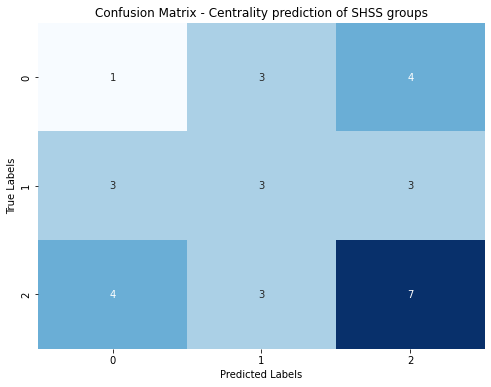

scores : [0.14285714 0.16666667 0.66666667 0.5        0.66666667]
--- Clustering ---
Accuracy: 0.4516
Precision: 0.4767
Recall: 0.4516
F1-score: 0.4588
Confusion Matrix:


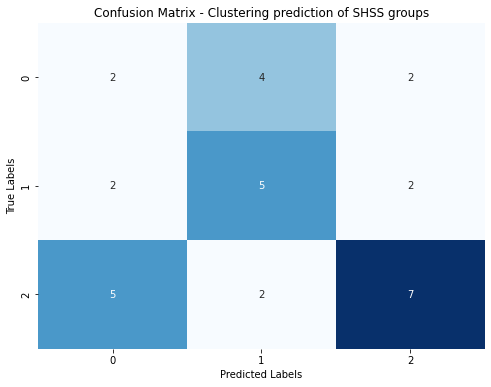

In [250]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_predict, StratifiedShuffleSplit
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


y = Y['SHSS_groups']
class_freq = y.value_counts().to_dict()
class_weight = {k: class_freq[k] for k in sorted(class_freq.keys())}

# Plot histogram of Y variable (SHSS groups)
plt.figure(figsize=(8, 6))
sns.histplot(data=y, kde=False, bins=len(y.unique()), color='blue')
plt.title(f'Histogram of SHSS Groups - {g_metric}')
plt.xlabel('SHSS Groups')
plt.ylabel('Frequency')
plt.show()

# Define classifiers
svc_clf = SVC(kernel='linear', C=1,class_weight = 'balanced',decision_function_shape = 'ovo',probability = True, random_state=42)
log_reg_clf = LogisticRegression(C=1, class_weight = 'balanced')
tree_clf = DecisionTreeClassifier(class_weight = 'balanced')

classifiers = [('svc', svc_clf), ('log_reg', log_reg_clf), ('tree', tree_clf)]

for features_matrix, g_metric in zip([X_con, X_degree, X_centrality, X_clustering], ['connectome','Degree', 'Centrality', 'Clustering']):
    # Assuming X is your feature matrix and y is the 'SHSS_groups' column
    X = features_matrix
    voting_clf = VotingClassifier(estimators=classifiers, voting='hard')

    pipeline = Pipeline([('std', StandardScaler()), ('pca', PCA(n_components=0.80)), ('clf', voting_clf)])

    skf = StratifiedKFold(n_splits=5,shuffle= True, random_state=42)
    y_pred = cross_val_predict(pipeline, X, y, cv=skf)
    scores = cross_val_score(pipeline, X, y, cv=skf)
    print('scores :', scores)
    # Calculate evaluation metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')

    print("---", g_metric, "---")
    print("Accuracy:",f"{accuracy:.4f}" )
    print("Precision:", f"{precision:.4f}")
    print("Recall:", f"{recall:.4f}")
    print("F1-score:", f"{f1:.4f}")

    cm = confusion_matrix(y, y_pred)
    print("Confusion Matrix:")
   # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {g_metric} prediction of SHSS groups')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

   

## Scale comparison

In [251]:
resultspz, atlas, labels = load_all(p, 'difumo64_z_precision', 'difumo64') # z precision
resultspp, atlas, labels = load_all(p, 'difumo64_precision', 'difumo64') # psc precision
resultscovz, atlas, labels = load_all(p, 'difumo64_z_covariance', 'difumo64') # z covariance
resultscorz, atlas, labels = load_all(p, 'difumo64_z_correlation', 'difumo64') # z correlation (+arctanh correction)

Loading atlas:  difumo64


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Dylan\\Desktop\\UM_Bsc_neurocog\\E22\\Projet_Ivado_rainvillelab\\results\\results_con\\difumo64_z_precision\\dict_results.pkl'

In [ ]:
resultspz.keys()
# comparison of precisionz, precisionp, covz, corz
print('pre_mean_connectome', resultspz['pre_mean_connectome'].max(), '{:f}'.format(resultspp['pre_mean_connectome'].max()), resultscovz['pre_mean_connectome'].max(), resultscorz['pre_mean_connectome'].max())
print('post_mean_connectome', resultspz['post_mean_connectome'].max(), '{:f}'.format(resultspp['post_mean_connectome'].max()), resultscovz['post_mean_connectome'].max(), resultscorz['post_mean_connectome'].max())
print('zcontrast_mean_connectome', resultspz['zcontrast_mean_connectome'].max(), '{:f}'.format(resultspp['zcontrast_mean_connectome'].max()), resultscovz['zcontrast_mean_connectome'].max(), resultscorz['zcontrast_mean_connectome'].max())
print('pre_series', resultspz['pre_series'][0].max(), '{:f}'.format(resultspp['pre_series'][0].max()), resultscovz['pre_series'][0].max(), resultscorz['pre_series'][0].max())


# Graph theory (single graph)

In [ ]:
import matplotlib.cm as cm
from scipy import stats
from scipy.stats import ttest_1samp

A = results['zcontrast_mean_connectome']
G = nx.from_numpy_matrix(np.matrix(A), create_using=nx.Graph)
G = nx.relabel_nodes(G, dict(zip(range(len(G.nodes())),labels)))
G.edges.data('weight')
edge_weights = G.edges.data('weight')


In [ ]:
# Get the basic structure and dimensions of the keys
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Nodes:", G.nodes())
print("Edges:", G.edges())

### Edge density plot

c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dylan\AppData\Local\Temp\ipykernel_57392\1205525686.py:18: RuntimeWarning: invalid value encountered in log10
  log10dist = sns.distplot(np.log10(matrixdiagNaN).flatten(), kde=False, ax=axes[1], norm_hist=True)


[Text(0.5, 0, 'log(weights)')]

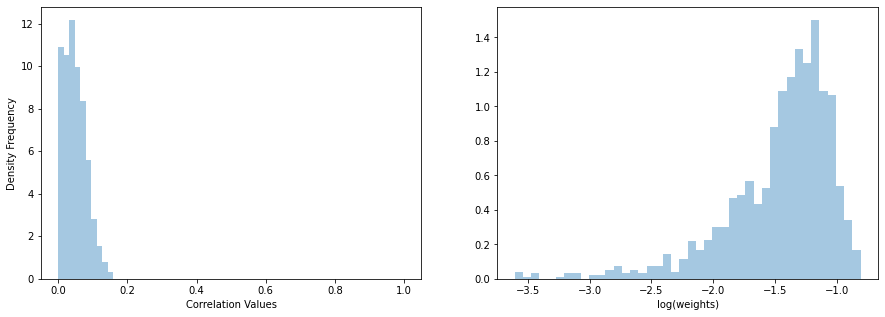

In [38]:
# plot heatmap
#plt.figure(figsize = (20, 20))
#_ = sns.heatmap(A, cmap='coolwarm', cbar=True, square=False, mask=None)
matrix = A
matrixdiagNaN = matrix.copy()
np.fill_diagonal(matrixdiagNaN,np.nan)

# Weight distribution plot
bins = np.arange(np.sqrt(len(np.concatenate(matrix))))
bins = (bins - np.min(bins))/np.ptp(bins)
fig, axes = plt.subplots(1,2, figsize=(15,5))

# Distribution of raw weights
rawdist = sns.distplot(matrixdiagNaN.flatten(), bins=bins, kde=False, ax=axes[0], norm_hist=True)
rawdist.set(xlabel='Correlation Values', ylabel = 'Density Frequency')

# Probability density of log10
log10dist = sns.distplot(np.log10(matrixdiagNaN).flatten(), kde=False, ax=axes[1], norm_hist=True)
log10dist.set(xlabel='log(weights)')

## Metrics

In [ ]:
import pygsp
G_fd = pygsp.graphs.Graph(A)
G_fd.compute_laplacian(lap_type="normalized")
G_fd.compute_fourier_basis()  # compute connectome harmonics

### Efficiency

In [ ]:

nx.global_efficiency(G)  # this gives efficiency for node 2 and 3


### Degree/Strength

Nodes sorted by degree (highest to lowest):
Middle frontal gyrus: 3.4629714840483086
Angular gyrus inferior: 3.2940604241855396
Calcarine sulcus anterior: 3.1590209709325356
Middle frontal gyrus anterior: 3.1503147623320067
Superior frontal sulcus: 3.0092678509700623
Superior frontal gyrus medial: 2.9375154698005903
Parieto-occipital sulcus anterior: 2.862738884451697
Cingulate cortex posterior: 2.817815174402064
Cerebellum I-V: 2.7448966690999677
Parieto-occipital sulcus middle: 2.6345160939505483
Angular gyrus superior: 2.578451413301711
Cuneus: 2.5130352397805216
Paracentral gyrus RH: 2.4961433871217347
Intraparietal sulcus: 2.478864654256787
Lingual gyrus: 2.4603376952117557
Precuneus anterior: 2.418738097767095
Cingulate gyrus mid-posterior: 2.3531183771897544
Lingual gyrus anterior: 2.251500442428438
Central sulcus: 2.22698482948959
Callosomarginal sulcus: 2.218555900247376
Superior frontal gyrus: 2.200133016130233
Intraparietal sulcus LH: 2.1728081059715154
Parieto-occipital sul

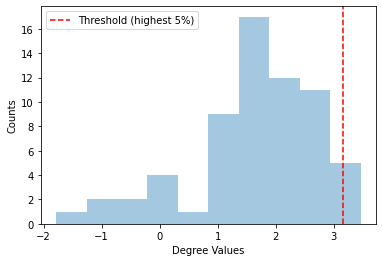

<Figure size 576x432 with 0 Axes>

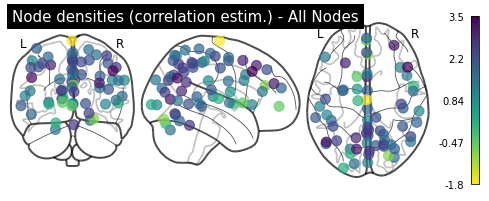

<Figure size 576x432 with 0 Axes>

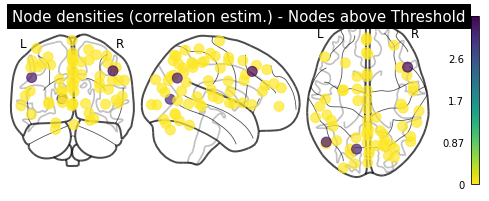

In [48]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import plotting

# Compute the degree of the graph
degree = dict(G.degree(weight='weight'))

# Sort the nodes by degree (highest to lowest)
sorted_degree = sorted(degree.items(), key=lambda x: x[1], reverse=True)

# Get the highest 5% of nodes and their degree values
top_5_percent = int(len(sorted_degree) * 0.05)
highest_nodes = sorted_degree[:top_5_percent]

# Print all nodes and their degree values
print("Nodes sorted by degree (highest to lowest):")
for node_label, deg in sorted_degree:
    print(f"{node_label}: {deg}")

# Print the threshold value
threshold = highest_nodes[-1][1]
print(f"Threshold (highest 5%): {threshold}")

# Degree Histogram
sns.distplot(list(degree.values()), kde=False, norm_hist=False)
plt.xlabel('Degree Values')
plt.ylabel('Counts')

# Plot the highest 5% values on the histogram
plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold (highest 5%)')
plt.legend()
plt.show()

# Plot the graph with degree values as the node markers
coords = plotting.find_probabilistic_atlas_cut_coords(atlas) 

# Plot the marker plot with all nodes
plt.figure(figsize=(8, 6))
plotting.plot_markers([degree[node] for node in G.nodes], coords, title='Node densities (correlation estim.) - All Nodes')
plt.show()

# Replace degree values below threshold with 0
for node_label, deg in degree.items():
    if deg < threshold:
        degree[node_label] = 0

# Plot the marker plot with only nodes above the threshold
plt.figure(figsize=(8, 6))
plotting.plot_markers([degree[node] for node in G.nodes], coords, title='Node densities (correlation estim.) - Nodes above Threshold')
plt.show()


In [ ]:
# degree
#Vertex degree quantifies the total number of vertex connections in an undirected binary network (Fornito et al. 2016)
G.degree(weight='weight')
strength = G.degree(weight='weight')
strengths = {node: val for (node, val) in strength}
nx.set_node_attributes(G, dict(strength), 'strength') # Add as nodal attribute

# Normalized node strength values 1/N-1
normstrenghts = {node: val * 1/(len(G.nodes)-1) for (node, val) in strength}
nx.set_node_attributes(G, normstrenghts, 'strengthnorm') # Add as nodal attribute

# Computing the mean degree of the network
normstrengthlist = np.array([val * 1/(len(G.nodes)-1) for (node, val) in strength])
mean_degree = np.sum(normstrengthlist)/len(G.nodes)
print('mean_degree :', mean_degree)
print(strengths)


### Centrality

c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NameError: name 'coords' is not defined

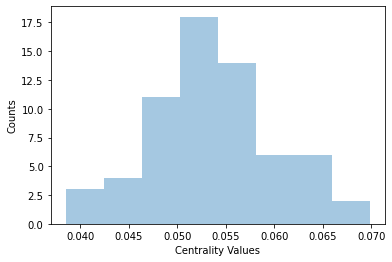

In [46]:
# The function accepts a argument 'distance' that, in correlation-based networks, must be seen as the inverse ... 
# of the weight value. Thus, a high correlation value (e.g., 0.8) means a shorter distance (i.e., 0.2).
G_distance_dict = {(e1, e2): 1 / abs(weight) for e1, e2, weight in G.edges(data='weight')}

# Then add them as attributes to the graph edges
nx.set_edge_attributes(G, G_distance_dict, 'distance')

# Computation of Closeness Centrality
closeness = nx.closeness_centrality(G, distance='distance')

# Now we add the closeness centrality value as an attribute to the nodes
nx.set_node_attributes(G, closeness, 'closecent')

# Closeness Centrality Histogram
sns.distplot(list(closeness.values()), kde=False, norm_hist=False)
plt.xlabel('Centrality Values')
plt.ylabel('Counts')

plotting.plot_markers([closeness[key] for key in sorted(closeness.keys())], coords)

print(['{} : {}'.format(node, G.nodes[node]['closecent']) for node in G.nodes if G.nodes[node]['closecent'] > 0.135])

Clossness centrality

Nodes sorted by closeness centrality (highest to lowest):
Parieto-occipital sulcus anterior: 0.06988447722761773
Calcarine sulcus anterior: 0.06647938651409918
Middle frontal gyrus anterior: 0.0655177258936116
Superior frontal sulcus: 0.06482598080918751
Cuneus: 0.06471241656307453
Middle frontal gyrus: 0.06401441734496643
Angular gyrus inferior: 0.06250674523176128
Heschl’s gyrus: 0.06245340608560281
Central sulcus: 0.06148636129381397
Parieto-occipital sulcus middle: 0.06147308116777434
Putamen: 0.06041617391419897
Cingulate cortex posterior: 0.06012963362871409
Paracentral gyrus RH: 0.060111523652608266
Superior frontal gyrus medial: 0.05873857687800845
Cerebellum I-V: 0.058021389110060495
Precuneus anterior: 0.05784961230540359
Dorsomedial prefrontal cortex antero-superior: 0.05764348910793004
Superior occipital gyrus: 0.05739345981916684
Middle temporal gyrus: 0.05705141400262267
Fusiform gyrus: 0.05650226986176506
Lingual gyrus anterior: 0.05634942573900021
Descending occipital g

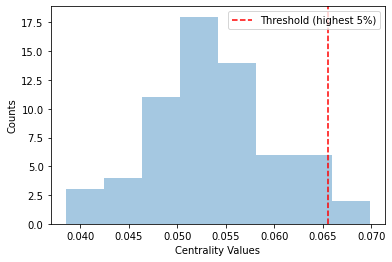

<Figure size 576x432 with 0 Axes>

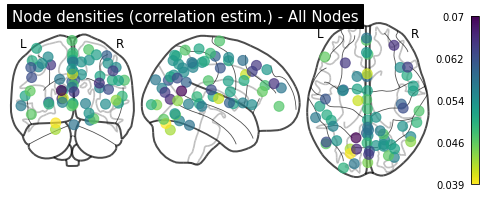

<Figure size 576x432 with 0 Axes>

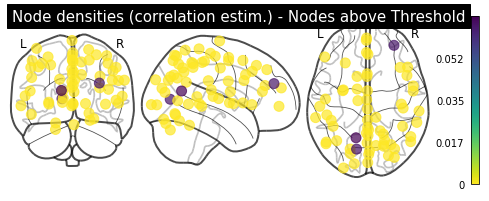

In [47]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import plotting

# The function accepts a argument 'distance' that, in correlation-based networks, must be seen as the inverse ... 
# of the weight value. Thus, a high correlation value (e.g., 0.8) means a shorter distance (i.e., 0.2).
G_distance_dict = {(e1, e2): 1 / abs(weight) for e1, e2, weight in G.edges(data='weight')}

# Then add them as attributes to the graph edges
nx.set_edge_attributes(G, G_distance_dict, 'distance')

# Computation of Closeness Centrality
closeness = nx.closeness_centrality(G, distance='distance')

# Now we add the closeness centrality value as an attribute to the nodes
nx.set_node_attributes(G, closeness, 'closecent')

# Sort the nodes by closeness centrality (highest to lowest)
sorted_closeness = sorted(closeness.items(), key=lambda x: x[1], reverse=True)

# Get the highest 5% of nodes and their centrality values
top_5_percent = int(len(sorted_closeness) * 0.05)
highest_nodes = sorted_closeness[:top_5_percent]

# Print all nodes and their closeness centrality values
print("Nodes sorted by closeness centrality (highest to lowest):")
for node_label, centrality in sorted_closeness:
    print(f"{node_label}: {centrality}")

# Print the threshold value
threshold = highest_nodes[-1][1]
print(f"Threshold (highest 5%): {threshold}")

# Closeness Centrality Histogram
sns.distplot(list(closeness.values()), kde=False, norm_hist=False)
plt.xlabel('Centrality Values')
plt.ylabel('Counts')

# Plot the highest 5% values on the histogram
plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold (highest 5%)')
plt.legend()
plt.show()

# Plot the graph with closeness centrality values as the node markers
coords = plotting.find_probabilistic_atlas_cut_coords(atlas) 

# Plot the marker plot with all nodes
plt.figure(figsize=(8, 6))
plotting.plot_markers([closeness[node] for node in G.nodes], coords, title='Node densities (correlation estim.) - All Nodes')
plt.show()

# Replace centrality values below threshold with 0
for node_label, centrality in closeness.items():
    if centrality < threshold:
        closeness[node_label] = 0

# Plot the marker plot with only nodes above the threshold
plt.figure(figsize=(8, 6))
plotting.plot_markers([closeness[node] for node in G.nodes], coords, title='Node densities (correlation estim.) - Nodes above Threshold')
plt.show()


### Distance and shortest path

"The shortest path is the path with the least number of edges (or least total weight) between two vertices in a network. In a weighted graph, the shortest path is calculated by the minimum sum of the weights of edges between two vertices (Fornito et al. 2016). 
he weights must be converted to ‘distance’ by computing the inverse of the original weight (1−weight or 1weight); a higher correlation value represents a shorter distance (Fornito et al. 2016)"(Centeno,2022)

In [43]:
# Distance
dist_dict = {(e1,e2): 1/abs(weight) for e1,e2 ,weight in G.edges.data('weight')}
nx.set_edge_attributes(G, dist_dict,'distance')

# Shortest path
short_path = dict(nx.all_pairs_dijkstra_path_length(G, weight='distance'))

In [44]:
short_path

{'Superior frontal sulcus': {'Superior frontal sulcus': 0,
  'Dorsomedial prefrontal cortex antero-superior': 6.8456822947838285,
  'Superior occipital gyrus': 7.281185546115225,
  'Heschl’s gyrus': 7.711226405836861,
  'Planum temporale': 8.152253917495992,
  'Parieto-occipital sulcus anterior': 8.311876732647379,
  'Parieto-occipital sulcus middle': 9.05499338504291,
  'Cuneus': 9.479186327059649,
  'Precentral gyrus superior': 9.576633980378302,
  'Putamen': 9.653077922883037,
  'Angular gyrus inferior': 9.778472527632571,
  'Superior temporal sulcus with angular gyrus': 10.00250052154236,
  'Descending occipital gyrus': 10.055468534686405,
  'Supramarginal gyrus': 10.303159398158389,
  'Caudate': 10.47950592056114,
  'Precuneus superior': 10.561887607721188,
  'Insula antero-superior': 10.646730099158834,
  'Middle temporal gyrus': 10.808910290087656,
  'Angular gyrus superior': 10.813957118774875,
  'Superior rostral gyrus': 11.612285067631245,
  'Calcarine sulcus anterior': 11.92

### *Clustering coefficient
The clustering coefficient assesses the tendency for any two neighbours of a vertex to be directly connected (or more strongly connected in the weighted case) to each other and can also be termed cliquishness (Hallquist and Hillary 2018)

Nodes sorted by clustering coefficient (highest to lowest):
Superior parietal lobule anterior: 0.16698247623250193
Paracentral lobule: 0.1634762663142077
Paracentral lobule superior: 0.15191232893402357
Postcentral gyrus LH: 0.14687860370513153
Superior frontal gyrus: 0.14599035222413145
Paracentral gyrus RH: 0.14598646245654032
Cuneus: 0.14234755147244
Lingual gyrus: 0.14232524050663162
Parieto-occipital sulcus middle: 0.1411913145415385
Superior parts of Postcentral and Precentral gyri: 0.14118667772593815
Superior occipital gyrus: 0.1387150550888742
Central sulcus: 0.13490044728298412
Calcarine sulcus anterior: 0.13385592571098967
Callosomarginal sulcus: 0.13133514004426655
Precentral gyrus superior: 0.13119137391002358
Precuneus superior: 0.1268447873169502
Cingulate gyrus mid-posterior: 0.12618660268160334
Precuneus anterior: 0.12496099992198123
Parieto-occipital sulcus superior: 0.12337776247472002
Middle frontal gyrus: 0.11868833567929851
Transverse sinus: 0.11792003811184852
Li

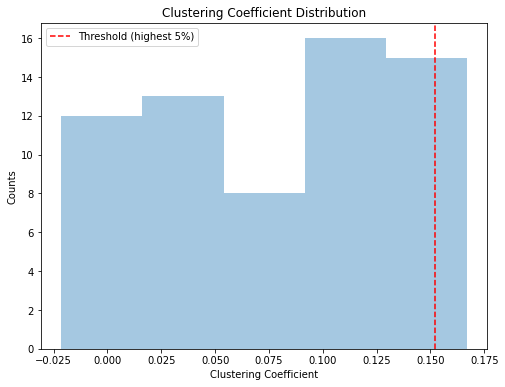

<Figure size 576x432 with 0 Axes>

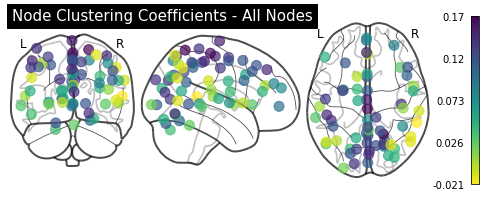

<Figure size 576x432 with 0 Axes>

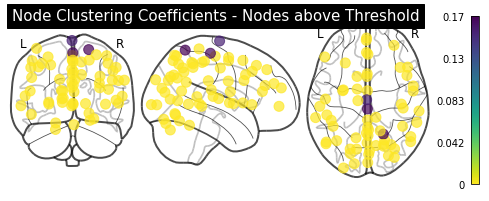

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import plotting

# Clustering Coefficient Calculation
clustering = nx.clustering(G, weight='weight')
nx.set_node_attributes(G, clustering, 'cc')

# Sort the nodes by clustering coefficient (highest to lowest)
sorted_clustering = sorted(clustering.items(), key=lambda x: x[1], reverse=True)

# Get the highest 5% of nodes and their clustering coefficients
top_5_percent = int(len(sorted_clustering) * 0.05)
highest_nodes = sorted_clustering[:top_5_percent]

# Print all nodes and their clustering coefficients
print("Nodes sorted by clustering coefficient (highest to lowest):")
for node_label, cc in sorted_clustering:
    print(f"{node_label}: {cc}")

# Print the threshold value
threshold = highest_nodes[-1][1]
print(f"Threshold (highest 5%): {threshold}")

# Clustering Coefficient Histogram
plt.figure(figsize=(8, 6))
sns.distplot(list(clustering.values()), kde=False, norm_hist=False)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Counts')
plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold (highest 5%)')
plt.legend()
plt.title('Clustering Coefficient Distribution')
plt.show()

# Plot the graph with clustering coefficients as the node markers
coords = plotting.find_probabilistic_atlas_cut_coords(atlas) 

# Plot the marker plot with all nodes
plt.figure(figsize=(8, 6))
plotting.plot_markers([clustering[node] for node in G.nodes], coords, title='Node Clustering Coefficients - All Nodes')
plt.show()

# Replace clustering coefficients values below threshold with 0
for node_label, cc in clustering.items():
    if cc < threshold:
        clustering[node_label] = 0

# Plot the marker plot with only nodes above the threshold
plt.figure(figsize=(8, 6))
plotting.plot_markers([clustering[node] for node in G.nodes], coords, title='Node Clustering Coefficients - Nodes above Threshold')
plt.show()


### ? *Modularity


In [34]:
#part = nx.community.best_partition(G, weight='weight') # Louvain algorithm
from networkx import community
#part = community.best_partition(G, weight='weight')

# check number of communities
#set(part.values()).union()
communities_generator = nx.community.girvan_newman(G)
top_level_communities = next(communities_generator)
nx.community.modularity(G, top_level_communities)
top_level_communities


NameError: name 'G' is not defined

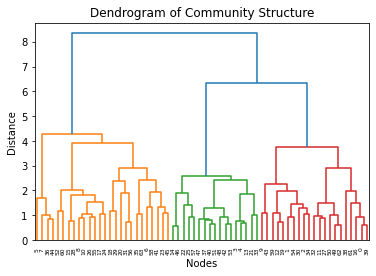

NotAPartition: Graph with 64 nodes and 2016 edges is not a valid partition of the graph ['Superior frontal sulcus']

In [86]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Your code to generate the communities
communities_generator = nx.community.girvan_newman(G)
top_level_communities = next(communities_generator)
modularity = nx.community.modularity(G, top_level_communities)

# Create a dendrogram of the community structure
dendrogram = sch.dendrogram(sch.linkage(nx.to_numpy_array(G), method='ward'))

# Set plot labels and title
plt.xlabel('Nodes')
plt.ylabel('Distance')
plt.title('Dendrogram of Community Structure')

# Show the plot
plt.show()

# Create a bar plot to show the modularity of each community
community_modularities = [nx.community.modularity(G, community) for community in top_level_communities]
community_labels = [f'Community {i + 1}' for i in range(len(top_level_communities))]

plt.bar(community_labels, community_modularities)
plt.xlabel('Community')
plt.ylabel('Modularity')
plt.title('Modularity of Top-Level Communities')
plt.xticks(rotation=45)

# Show the plot
plt.show()


### Visualization

## Clustering

In [ ]:
lcc = nx.clustering(G, weight='weight')

<Figure size 576x432 with 0 Axes>

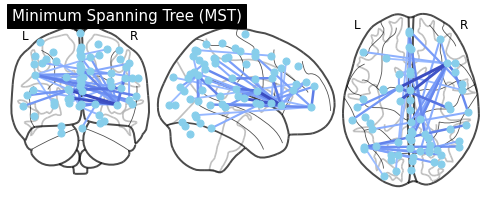

In [88]:
# minimum spanning tree
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import plotting

# Compute the minimum spanning tree
mst = nx.minimum_spanning_tree(G, weight='weight')

# Plot the MST on the brain template
coords = plotting.find_probabilistic_atlas_cut_coords(atlas) 

plt.figure(figsize=(8, 6))
plotting.plot_connectome(adjacency_matrix=nx.to_numpy_array(mst),
                         node_coords=coords,
                         node_color='skyblue',
                         edge_cmap='coolwarm',
                         edge_threshold='98%',
                         title='Minimum Spanning Tree (MST)')
plt.show()
